# IMPORT LIBRARY

In [1]:
#!pip install missingno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# LOAD THE DATA

In [2]:
data=pd.read_csv('C:/Users/ASUS/OneDrive/Documents/TECHNOCOLABS/bandora_raw_data/Bondora_raw.csv',low_memory=False)

In [3]:
data.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+


# DATA PREPROCESSING

In [4]:
print(data.dtypes)

ReportAsOfEOD                           object
LoanId                                  object
LoanNumber                               int64
ListedOnUTC                             object
BiddingStartedOn                        object
                                        ...   
NrOfScheduledPayments                  float64
ReScheduledOn                           object
PrincipalDebtServicingCost             float64
InterestAndPenaltyDebtServicingCost    float64
ActiveLateLastPaymentCategory           object
Length: 112, dtype: object


In [5]:
#OBSERVING TYPES OF DATA TYPES

In [6]:
print("COLUMNS                        :   DATA TYPES")
for i in data.columns:
    print("{}                         :      {}".format(i,data[i].dtypes) )

COLUMNS                        :   DATA TYPES
ReportAsOfEOD                         :      object
LoanId                         :      object
LoanNumber                         :      int64
ListedOnUTC                         :      object
BiddingStartedOn                         :      object
BidsPortfolioManager                         :      int64
BidsApi                         :      int64
BidsManual                         :      float64
UserName                         :      object
NewCreditCustomer                         :      bool
LoanApplicationStartedDate                         :      object
LoanDate                         :      object
ContractEndDate                         :      object
FirstPaymentDate                         :      object
MaturityDate_Original                         :      object
MaturityDate_Last                         :      object
ApplicationSignedHour                         :      int64
ApplicationSignedWeekday                         :    

# CATEGORICAL COLUMNS

In [7]:
cat_cols=data.select_dtypes(exclude=['int','float']).columns
cat_cols

Index(['ReportAsOfEOD', 'LoanId', 'ListedOnUTC', 'BiddingStartedOn',
       'UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'ContractEndDate', 'FirstPaymentDate',
       'MaturityDate_Original', 'MaturityDate_Last', 'DateOfBirth', 'Country',
       'County', 'City', 'NrOfDependants', 'EmploymentDurationCurrentEmployer',
       'EmploymentPosition', 'WorkExperience',
       'ActiveScheduleFirstPaymentReached', 'LastPaymentOn', 'DebtOccuredOn',
       'DebtOccuredOnForSecondary', 'DefaultDate', 'StageActiveSince',
       'Rating', 'Rating_V0', 'Rating_V1', 'Rating_V2', 'Status',
       'Restructured', 'ActiveLateCategory', 'WorseLateCategory',
       'CreditScoreEsMicroL', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'ActiveLateLastPaymentCategory'],
      dtype='object')

In [8]:
enc_data=list(cat_cols)
enc_data=enc_data[:-1]
enc_data

['ReportAsOfEOD',
 'LoanId',
 'ListedOnUTC',
 'BiddingStartedOn',
 'UserName',
 'NewCreditCustomer',
 'LoanApplicationStartedDate',
 'LoanDate',
 'ContractEndDate',
 'FirstPaymentDate',
 'MaturityDate_Original',
 'MaturityDate_Last',
 'DateOfBirth',
 'Country',
 'County',
 'City',
 'NrOfDependants',
 'EmploymentDurationCurrentEmployer',
 'EmploymentPosition',
 'WorkExperience',
 'ActiveScheduleFirstPaymentReached',
 'LastPaymentOn',
 'DebtOccuredOn',
 'DebtOccuredOnForSecondary',
 'DefaultDate',
 'StageActiveSince',
 'Rating',
 'Rating_V0',
 'Rating_V1',
 'Rating_V2',
 'Status',
 'Restructured',
 'ActiveLateCategory',
 'WorseLateCategory',
 'CreditScoreEsMicroL',
 'CreditScoreEsEquifaxRisk',
 'CreditScoreFiAsiakasTietoRiskGrade',
 'GracePeriodStart',
 'GracePeriodEnd',
 'NextPaymentDate',
 'ReScheduledOn']

# OBSERVING SOME UNIQUE VALUE

In [9]:
data['Status'].unique()

array(['Repaid', 'Late', 'Current'], dtype=object)

In [10]:
data['EmploymentPosition'].unique()

array(['klienditeenindaja', 'Õppealajuhataja lasteaias', 'teenindaja',
       ..., 'elektromonter', 'finančný referent', 'Guardia vigilante'],
      dtype=object)

In [11]:
data['Rating'].unique()

array([nan, 'F', 'C', 'HR', 'D', 'E', 'B', 'A', 'AA'], dtype=object)

In [12]:
data['County'].unique()

array(['HARJU', 'IDA-VIRU', 'PÄRNU', ..., 'ÖSTNYLAND', 'HANKO',
       'POHJOIS-POHJOINMAA'], dtype=object)

In [13]:
data['Rating_V2'].unique()

array([nan, 'D', 'B', 'HR', 'F', 'C', 'E', 'A', 'AA'], dtype=object)

# ANALYZING NULL VALUE USING MATRIX

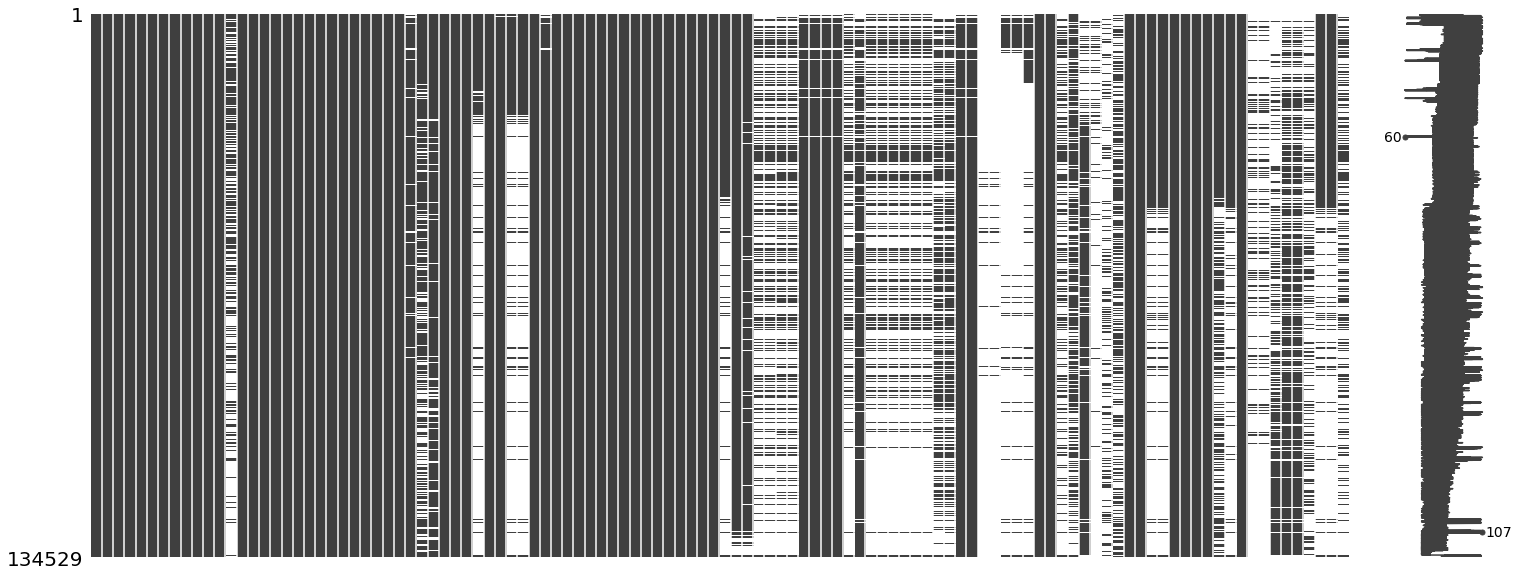

<Figure size 1800x1080 with 0 Axes>

In [14]:
import missingno as msno
msno.matrix(data)
plt.figure(figsize = (25,15))
plt.show()

THE DASH HORIZONTAL LINE SHOW THE MISSING VALUE IN THAT AREA IN BETWEEN THE COLUMN
WE CAN EASILY SEE HOW MUCH OUR DATA IS NULL

# USING HEATMAP

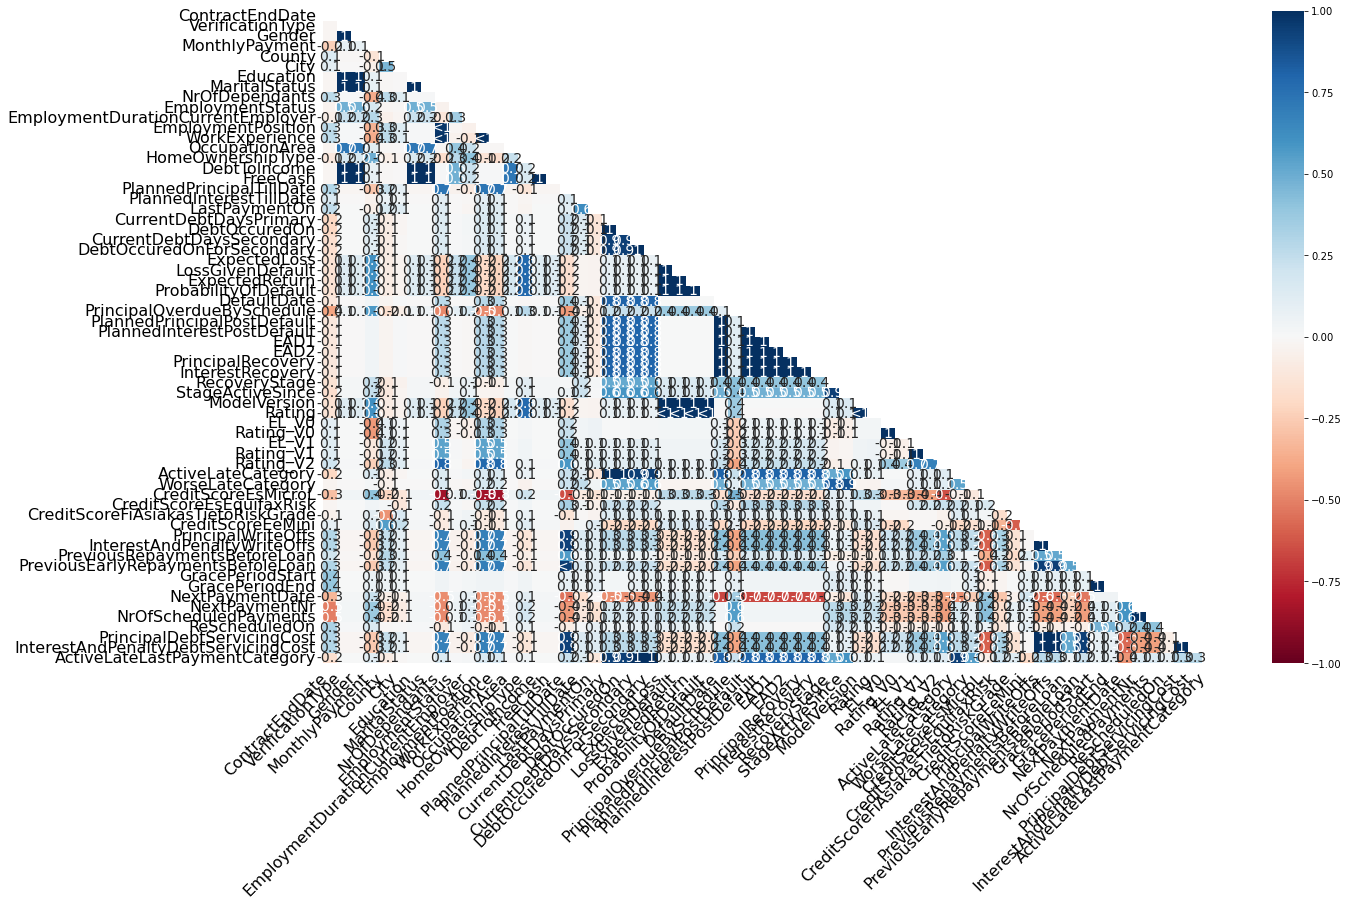

<Figure size 2160x2160 with 0 Axes>

In [15]:
msno.heatmap(data, labels = True)
plt.figure(figsize = (30,30))
plt.show()

IT WILL GIVE THE CORRELATION BETWEEN COLUMN THAT PRESENT IN DATA IT MEANS IF A1 AND A2 80% CORRELATED THEN IF A1 IS PRESENT THEN A2 SHOULD BE IN THAT CASE WE WILL  AVOID DELLETING SAMPLE/COLUMN.

# TRANSFORM DATA TYPES OF SOME COLUMN

In [16]:
pd.to_datetime(data['BiddingStartedOn'], errors='coerce', infer_datetime_format=True).fillna(0)
pd.to_datetime(data['ListedOnUTC'], errors='coerce', infer_datetime_format=True).fillna(0)

0        2009-06-11 16:40:39
1        2009-06-10 15:48:57
2        2009-06-05 19:12:29
3        2009-06-13 12:01:20
4        2009-06-10 10:17:13
                 ...        
134524   2015-01-02 16:31:36
134525   2015-01-05 16:14:26
134526   2015-01-02 14:04:27
134527   2015-01-05 16:56:12
134528   2015-01-06 11:07:06
Name: ListedOnUTC, Length: 134529, dtype: datetime64[ns]

# MISSING COLUMNS

In [17]:
missing_columns = [col for col in data.columns if data[col].isnull().sum() > 0]
print(len(missing_columns))
missing_columns 

64


['ContractEndDate',
 'VerificationType',
 'Gender',
 'MonthlyPayment',
 'County',
 'City',
 'Education',
 'MaritalStatus',
 'NrOfDependants',
 'EmploymentStatus',
 'EmploymentDurationCurrentEmployer',
 'EmploymentPosition',
 'WorkExperience',
 'OccupationArea',
 'HomeOwnershipType',
 'DebtToIncome',
 'FreeCash',
 'PlannedPrincipalTillDate',
 'PlannedInterestTillDate',
 'LastPaymentOn',
 'CurrentDebtDaysPrimary',
 'DebtOccuredOn',
 'CurrentDebtDaysSecondary',
 'DebtOccuredOnForSecondary',
 'ExpectedLoss',
 'LossGivenDefault',
 'ExpectedReturn',
 'ProbabilityOfDefault',
 'DefaultDate',
 'PrincipalOverdueBySchedule',
 'PlannedPrincipalPostDefault',
 'PlannedInterestPostDefault',
 'EAD1',
 'EAD2',
 'PrincipalRecovery',
 'InterestRecovery',
 'RecoveryStage',
 'StageActiveSince',
 'ModelVersion',
 'Rating',
 'EL_V0',
 'Rating_V0',
 'EL_V1',
 'Rating_V1',
 'Rating_V2',
 'ActiveLateCategory',
 'WorseLateCategory',
 'CreditScoreEsMicroL',
 'CreditScoreEsEquifaxRisk',
 'CreditScoreFiAsiakasTieto

# HOW MUCH DATA IS NULL IN EACH COLUMN

In [18]:
def get_numerical_summary(data):
    total = data.shape[0]
    missing_columns = [col for col in data.columns if data[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = data[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [19]:
missing_percent=get_numerical_summary(data)

ContractEndDate : 75546 (56.156%)
VerificationType : 45 (0.033%)
Gender : 45 (0.033%)
MonthlyPayment : 6685 (4.969%)
County : 36840 (27.384%)
City : 9794 (7.28%)
Education : 45 (0.033%)
MaritalStatus : 45 (0.033%)
NrOfDependants : 98929 (73.537%)
EmploymentStatus : 197 (0.146%)
EmploymentDurationCurrentEmployer : 876 (0.651%)
EmploymentPosition : 98439 (73.173%)
WorkExperience : 98007 (72.852%)
OccupationArea : 86 (0.064%)
HomeOwnershipType : 1652 (1.228%)
DebtToIncome : 45 (0.033%)
FreeCash : 45 (0.033%)
PlannedPrincipalTillDate : 80070 (59.519%)
PlannedInterestTillDate : 3942 (2.93%)
LastPaymentOn : 9531 (7.085%)
CurrentDebtDaysPrimary : 86011 (63.935%)
DebtOccuredOn : 86011 (63.935%)
CurrentDebtDaysSecondary : 82279 (61.161%)
DebtOccuredOnForSecondary : 82279 (61.161%)
ExpectedLoss : 2636 (1.959%)
LossGivenDefault : 2636 (1.959%)
ExpectedReturn : 2636 (1.959%)
ProbabilityOfDefault : 2636 (1.959%)
DefaultDate : 91614 (68.1%)
PrincipalOverdueBySchedule : 14837 (11.029%)
PlannedPrincip

# HANDLING MISSING VALUES

## REMOVING COLUMN

In [20]:
 #Threshold to remove attribute having missing values greater than threshold
ATTRIBUTE_THRESHOLD = 50 #50% in this case 

for col, per in missing_percent.items():
    if col!='DefaultDate':
        if per > ATTRIBUTE_THRESHOLD:
            data.drop(col, axis = 1, inplace = True)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 79 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ReportAsOfEOD                           134529 non-null  object 
 1   LoanId                                  134529 non-null  object 
 2   LoanNumber                              134529 non-null  int64  
 3   ListedOnUTC                             134529 non-null  object 
 4   BiddingStartedOn                        134529 non-null  object 
 5   BidsPortfolioManager                    134529 non-null  int64  
 6   BidsApi                                 134529 non-null  int64  
 7   BidsManual                              134529 non-null  float64
 8   UserName                                134529 non-null  object 
 9   NewCreditCustomer                       134529 non-null  bool   
 10  LoanApplicationStartedDate              1345

In [22]:
missing_percent=get_numerical_summary(data)

VerificationType : 45 (0.033%)
Gender : 45 (0.033%)
MonthlyPayment : 6685 (4.969%)
County : 36840 (27.384%)
City : 9794 (7.28%)
Education : 45 (0.033%)
MaritalStatus : 45 (0.033%)
EmploymentStatus : 197 (0.146%)
EmploymentDurationCurrentEmployer : 876 (0.651%)
OccupationArea : 86 (0.064%)
HomeOwnershipType : 1652 (1.228%)
DebtToIncome : 45 (0.033%)
FreeCash : 45 (0.033%)
PlannedInterestTillDate : 3942 (2.93%)
LastPaymentOn : 9531 (7.085%)
ExpectedLoss : 2636 (1.959%)
LossGivenDefault : 2636 (1.959%)
ExpectedReturn : 2636 (1.959%)
ProbabilityOfDefault : 2636 (1.959%)
DefaultDate : 91614 (68.1%)
PrincipalOverdueBySchedule : 14837 (11.029%)
RecoveryStage : 57288 (42.584%)
StageActiveSince : 53575 (39.824%)
ModelVersion : 2636 (1.959%)
Rating : 2730 (2.029%)
WorseLateCategory : 45456 (33.789%)
CreditScoreEsMicroL : 29574 (21.983%)
CreditScoreEeMini : 62807 (46.687%)
PreviousRepaymentsBeforeLoan : 43161 (32.083%)
NextPaymentNr : 36741 (27.311%)
NrOfScheduledPayments : 36741 (27.311%)


In [23]:
cols_del = ['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth',
       'BiddingStartedOn','UserName','NextPaymentNr',
       'NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory']

In [24]:
data.drop(columns=cols_del, inplace=True)
data.shape

(134529, 50)

In [25]:
data = data.loc[data['Status']!='Current']
data.shape


(77394, 50)

# TARGET

In [26]:
data['DefaultDate'].unique()

array([nan, '2012-07-16', '2009-09-28', ..., '2015-08-28', '2015-10-27',
       '2016-01-21'], dtype=object)

In [27]:
data['DefaultDate'] = pd.to_datetime(data['DefaultDate'], format="%Y-%m-%d", errors='coerce')

In [28]:
data['DefaultDate'] = data['DefaultDate'].fillna(value ="Null Date")
data['DefaultDate'].unique()

array(['Null Date', Timestamp('2012-07-16 00:00:00'),
       Timestamp('2009-09-28 00:00:00'), ...,
       Timestamp('2015-08-28 00:00:00'), Timestamp('2015-10-27 00:00:00'),
       Timestamp('2016-01-21 00:00:00')], dtype=object)

In [29]:
# Now, we will create new target variable
# where 0 will be assigned when default date is null means borrower has never defaulted
# while 1 in case default date is present.
data['Default'] = [1 if i != "Null Date" else 0 for i in data["DefaultDate"]]

In [30]:
data.Default.value_counts()

1    42794
0    34600
Name: Default, dtype: int64

In [31]:
data.drop(columns=['DefaultDate','Status'], inplace=True)

## REMOVING SAMPLE

# Getting Missing count of each sample            

for idx in range(data.shape[0]):
    data.loc[idx, 'missing_count'] = data.iloc[idx, :].isnull().sum() 

 #Threshold to remove samples having missing values greater than threshold
SAMPLE_THRESHOLD = 10  #NO OF COLUMN HAVING MISSING FOR EACH SAMPLE

print("Samples Before Removal : {}".format(data.shape[0]))

data.drop(data[data['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print("Samples After Removal : {}".format(data.shape[0]))

In [32]:
#data.drop(['missing_count'],axis=1,inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77394 entries, 0 to 134528
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   NewCreditCustomer                       77394 non-null  bool   
 4   LoanDate                                77394 non-null  object 
 5   FirstPaymentDate                        77394 non-null  object 
 6   MaturityDate_Original                   77394 non-null  object 
 7   MaturityDate_Last                       77394 non-null  object 
 8   VerificationType                        77349 non-null  float64
 9   LanguageCode                            77394 non-null  int64  
 10  Age                                     77394 non-null  i

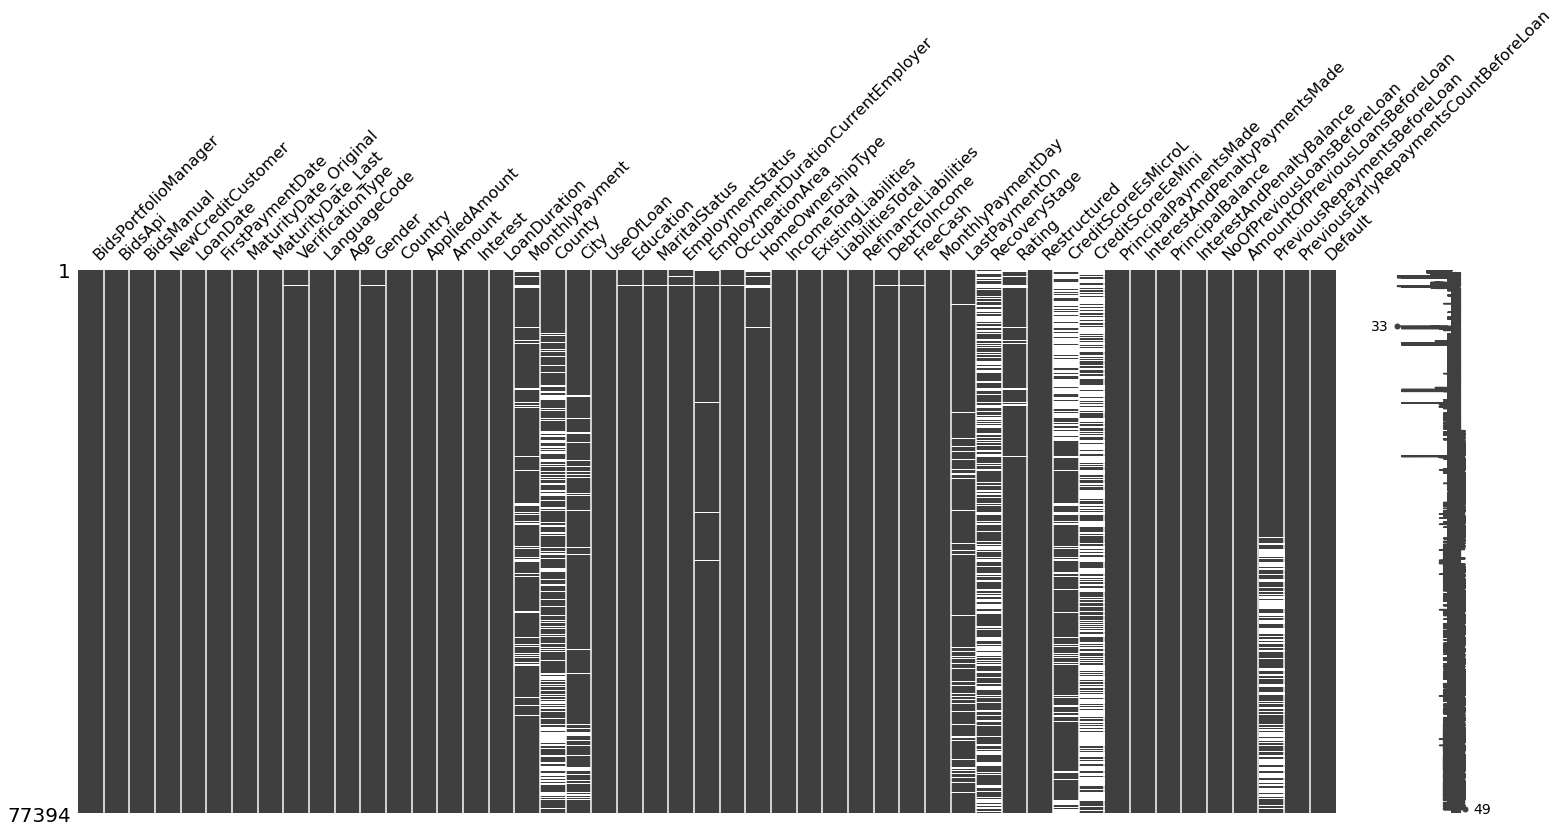

<Figure size 1440x1080 with 0 Axes>

In [34]:
import missingno as msno
msno.matrix(data)
plt.figure(figsize = (20,15))
plt.show()

## HANDLING NUMERICAL COLUMN

In [35]:
num_cols = [col for col in data.columns if data[col].dtype != 'object']
print(num_cols)
data[num_cols].isnull().sum()

['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Age', 'Gender', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus', 'OccupationArea', 'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay', 'RecoveryStage', 'Restructured', 'CreditScoreEeMini', 'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade', 'PrincipalBalance', 'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan', 'PreviousEarlyRepaymentsCountBeforeLoan', 'Default']


BidsPortfolioManager                          0
BidsApi                                       0
BidsManual                                    0
NewCreditCustomer                             0
VerificationType                             45
LanguageCode                                  0
Age                                           0
Gender                                       45
AppliedAmount                                 0
Amount                                        0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                             6627
UseOfLoan                                     0
Education                                    45
MaritalStatus                                45
EmploymentStatus                            197
OccupationArea                               86
HomeOwnershipType                          1652
IncomeTotal                                   0
ExistingLiabilities                     

## VISUALIZE NUMERICAL VALUE

<AxesSubplot:>

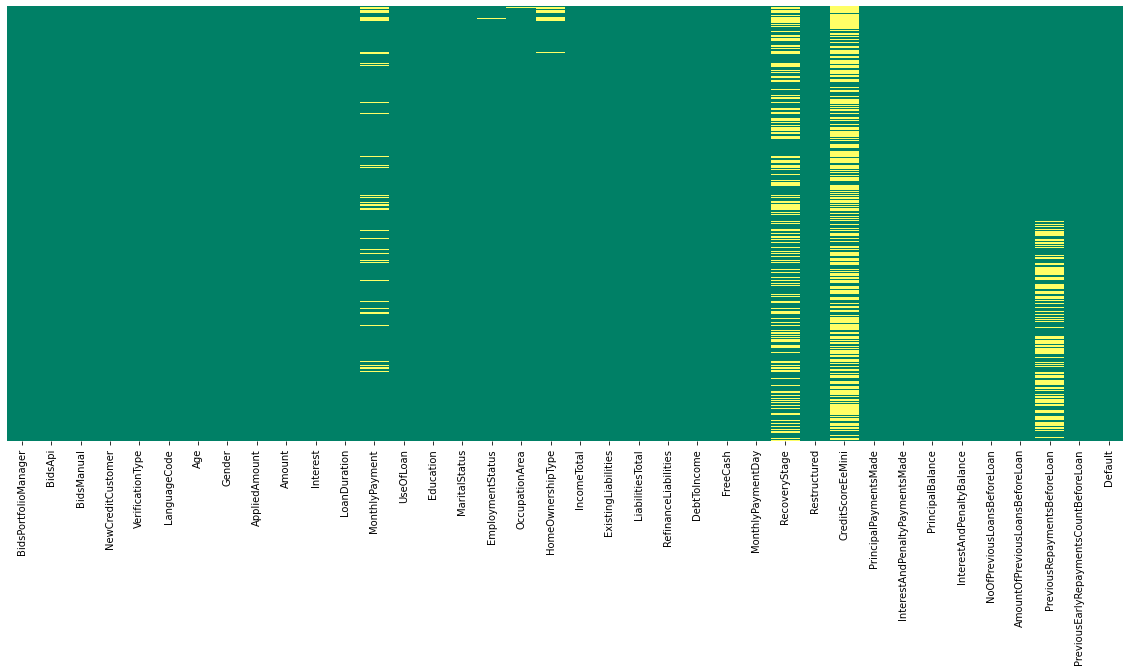

In [36]:
plt.figure(figsize=(20,8))
sns.heatmap(data[num_cols].isnull(), yticklabels=False, cbar=False, cmap = 'summer')

ABOVE CHART SHOWS IN SOME COLUMN HAVING  VERY LARGE NO OF NULL VALUE(DASH YELLOW LINE)

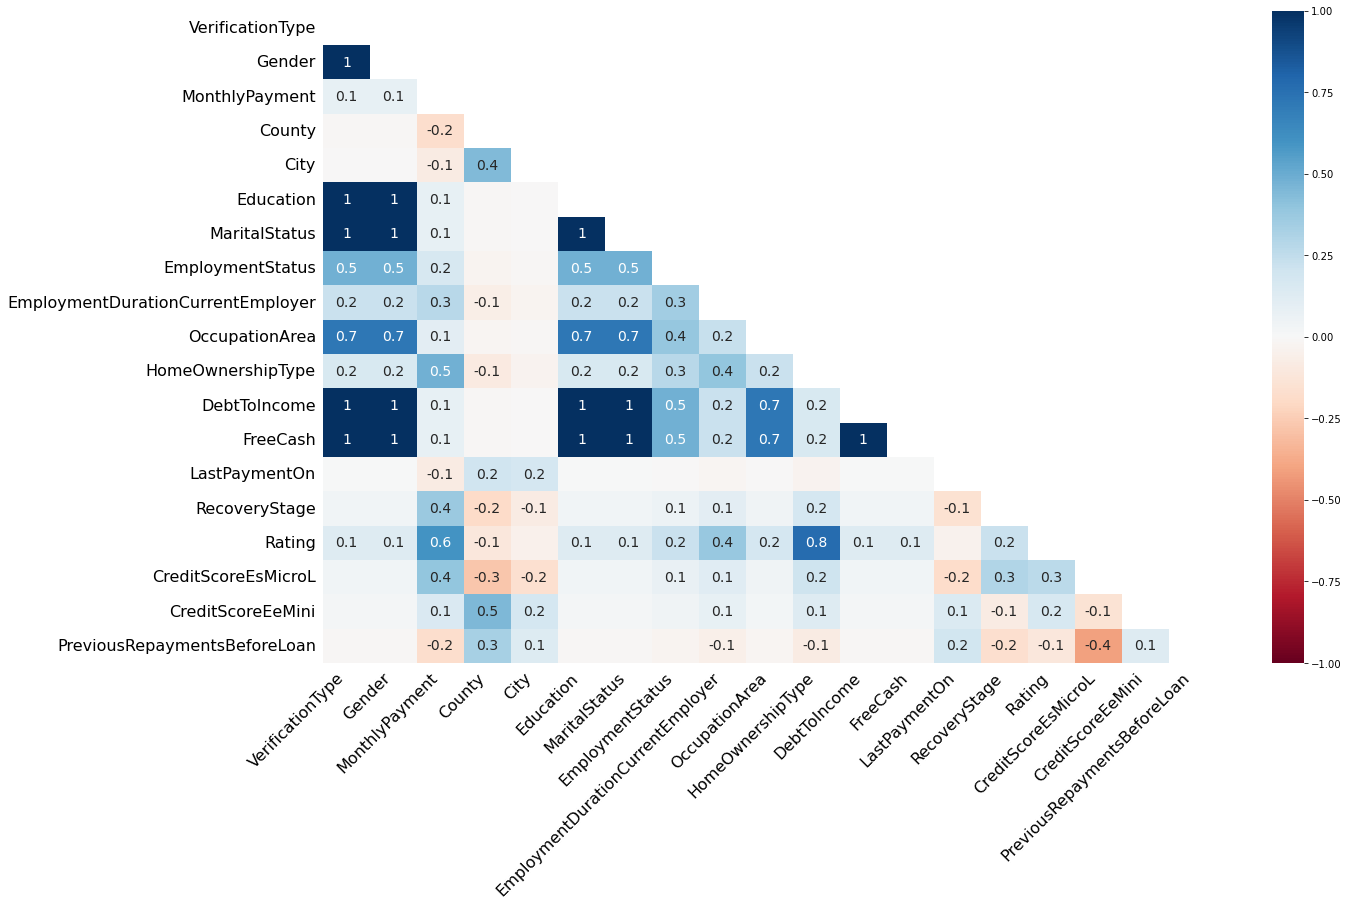

<Figure size 2160x2160 with 0 Axes>

In [37]:
msno.heatmap(data, labels = True)
plt.figure(figsize = (30,30))
plt.show()

we can observed by seeing the correlation matrix  as-
1.RecoveryStage b/n 'WorseLateCategory' 80%
2.CreditScoreEeMini  has related only 60% with county.
3.PreviousRepaymentsBeforeLoan  has 30% with county so, it can be droped
4.NrOfScheduledPayments  has 50% with PrincipalOverdueBySchedule it can be drop because both have null values.

In [38]:
data= data.drop(columns=['PreviousRepaymentsBeforeLoan'])

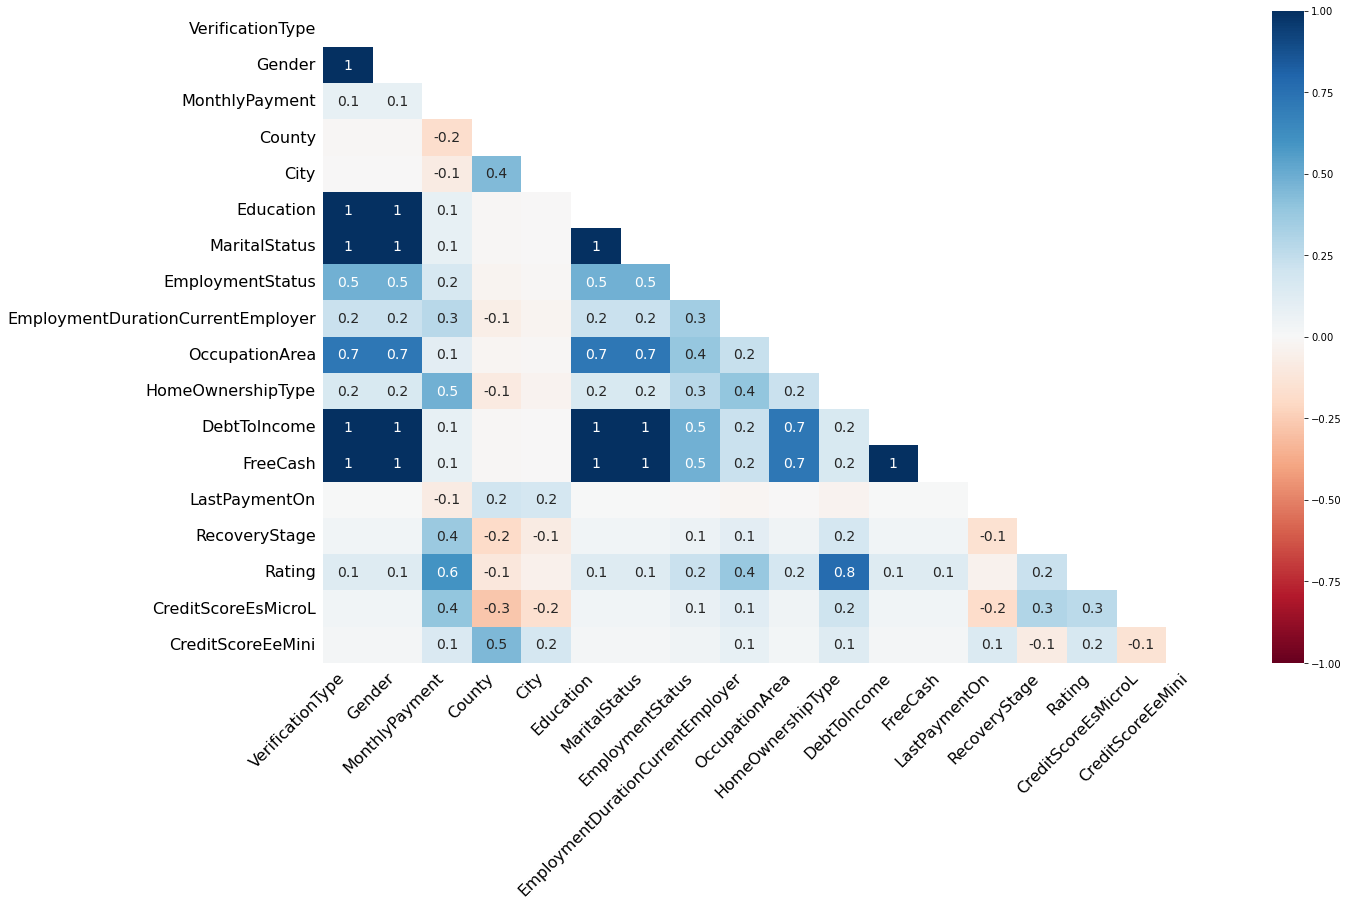

<Figure size 2160x2160 with 0 Axes>

In [39]:
msno.heatmap(data, labels = True)
plt.figure(figsize = (30,30))
plt.show()

In [40]:
num_cols = [col for col in data.columns if data[col].dtype != 'object']
data[num_cols].isnull().sum()

BidsPortfolioManager                          0
BidsApi                                       0
BidsManual                                    0
NewCreditCustomer                             0
VerificationType                             45
LanguageCode                                  0
Age                                           0
Gender                                       45
AppliedAmount                                 0
Amount                                        0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                             6627
UseOfLoan                                     0
Education                                    45
MaritalStatus                                45
EmploymentStatus                            197
OccupationArea                               86
HomeOwnershipType                          1652
IncomeTotal                                   0
ExistingLiabilities                     

## IMPUTING NUMERICAL NULL VALUES

In [41]:
data['MonthlyPayment'].tail(10)
#we can impute using avreage value of that column
data['EmploymentStatus'].head(10) # this is not numerical column we will change type
#as it is showing some encoded values so it will be fill by mode or it is vey less we can delete that row
#data['PlannedInterestTillDate'].head(10)
#as it is money which can be filled by mean but it will be better if will delete that row due to bias
#data['PrincipalOverdueBySchedule'].head(10)
#we can fill by mean value
data['RecoveryStage'].head(10) #not numerical its categorical
#its order value we can use mode as data is high it will be bias but also cant delete the row
data['CreditScoreEeMini'].head(10)
# #fill by mean,mode,median
#data['NextPaymentNr'].tail(50)
# #fill by mean

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: CreditScoreEeMini, dtype: float64

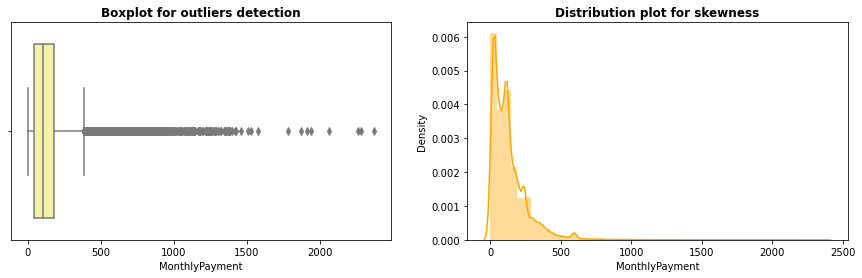

In [42]:
 #Visualizing feature for outliers and skewnwss
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x = data["MonthlyPayment"],palette='terrain_r')
plt.title("Boxplot for outliers detection", fontweight="bold")

plt.subplot(1, 2, 2)
ax=sns.distplot(data["MonthlyPayment"],color='orange')
# ax.axvline(data["PlannedInterestTillDate"].mean(),color='black')
# ax.axvline(data["PlannedInterestTillDate"].median(),color='red')
# ax.axvline(data["PlannedInterestTillDate"].mode()[0],color='green')
plt.title("Distribution plot for skewness", fontweight="bold")

plt.show()

having outlier so it will be better to fill with median

In [43]:
# plt.figure(figsize=(15, 4))

# plt.subplot(1, 2, 1)
# sns.boxplot(x = data["PlannedInterestTillDate"],palette='terrain_r')
# plt.title("Boxplot for outliers detection", fontweight="bold")

# plt.subplot(1, 2, 2)
# ax=sns.distplot(data["PlannedInterestTillDate"],color='orange')
# # ax.axvline(data["PlannedInterestTillDate"].mean(),color='black')
# # ax.axvline(data["PlannedInterestTillDate"].median(),color='red')
# # ax.axvline(data["PlannedInterestTillDate"].mode()[0],color='green')
# plt.title("Distribution plot for skewness", fontweight="bold")

# plt.show()

having outlier so it will be better to fill with mean because outlier is in upperbound mean>median

In [44]:
# plt.figure(figsize=(15, 4))

# plt.subplot(1, 2, 1)
# sns.boxplot(x = data["PrincipalOverdueBySchedule"],palette='terrain_r')
# plt.title("Boxplot for outliers detection", fontweight="bold")

# plt.subplot(1, 2, 2)
# ax=sns.distplot(data["PrincipalOverdueBySchedule"],color='orange')
# # ax.axvline(data["PlannedInterestTillDate"].mean(),color='black')
# # ax.axvline(data["PlannedInterestTillDate"].median(),color='red')
# # ax.axvline(data["PlannedInterestTillDate"].mode()[0],color='green')
# plt.title("Distribution plot for skewness", fontweight="bold")

# plt.show()

it will be better if we drop this column

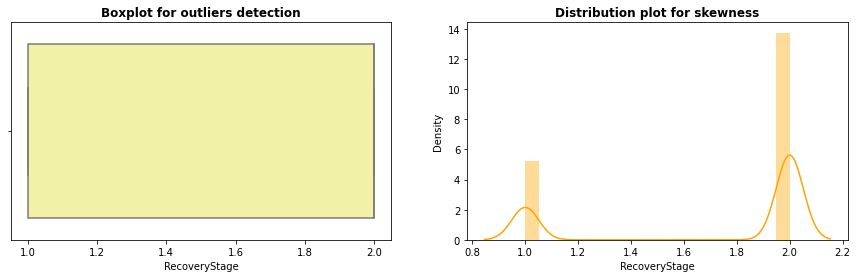

In [45]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x = data["RecoveryStage"],palette='terrain_r')
plt.title("Boxplot for outliers detection", fontweight="bold")

plt.subplot(1, 2, 2)
ax=sns.distplot(data["RecoveryStage"],color='orange')
# ax.axvline(data["PlannedInterestTillDate"].mean(),color='black')
# ax.axvline(data["PlannedInterestTillDate"].median(),color='red')
# ax.axvline(data["PlannedInterestTillDate"].mode()[0],color='green')
plt.title("Distribution plot for skewness", fontweight="bold")

plt.show()

In [46]:
# plt.figure(figsize=(15, 4))

# plt.subplot(1, 2, 1)
# sns.boxplot(x = data["ModelVersion"],palette='terrain_r')
# plt.title("Boxplot for outliers detection", fontweight="bold")

# plt.subplot(1, 2, 2)
# sns.distplot(data["ModelVersion"],color='orange')
# plt.title("Distribution plot for skewness", fontweight="bold")

# plt.show()

having outlier but not to much vary and its normal

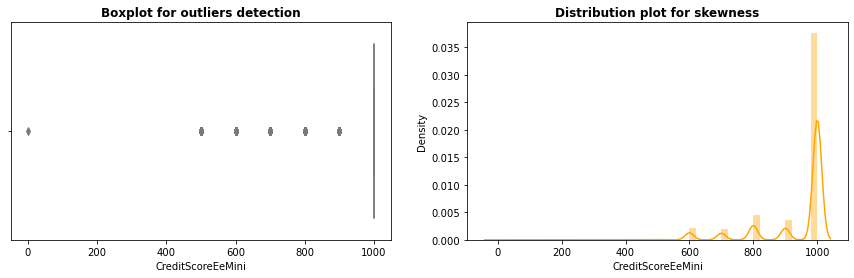

In [47]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x = data["CreditScoreEeMini"],palette='terrain_r')
plt.title("Boxplot for outliers detection", fontweight="bold")

plt.subplot(1, 2, 2)
ax=sns.distplot(data["CreditScoreEeMini"],color='orange')
# ax.axvline(data["PlannedInterestTillDate"].mean(),color='black')
# ax.axvline(data["PlannedInterestTillDate"].median(),color='red')
# ax.axvline(data["PlannedInterestTillDate"].mode()[0],color='green')
plt.title("Distribution plot for skewness", fontweight="bold")

plt.show()

its looking normal and not having outlier

In [48]:
plt.figure(figsize=(15, 4))

# plt.subplot(1, 2, 1)
# sns.boxplot(x = data["NextPaymentNr"],palette='terrain_r')
# plt.title("Boxplot for outliers detection", fontweight="bold")

# plt.subplot(1, 2, 2)
# ax=sns.distplot(data["NextPaymentNr"],color='orange')
# # ax.axvline(data["PlannedInterestTillDate"].mean(),color='black')
# # ax.axvline(data["PlannedInterestTillDate"].median(),color='red')
# # ax.axvline(data["PlannedInterestTillDate"].mode()[0],color='green')
# plt.title("Distribution plot for skewness", fontweight="bold")

# plt.show()

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

its having outlier and right skewed

<AxesSubplot:>

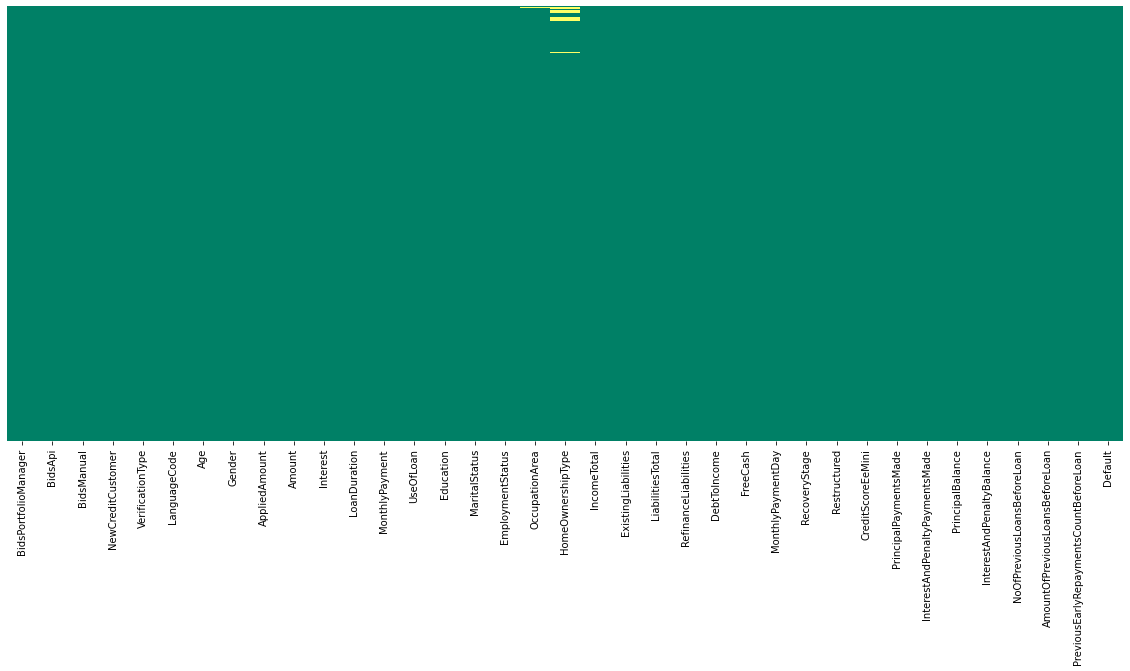

In [49]:
data['MonthlyPayment']=data['MonthlyPayment'].fillna(data['MonthlyPayment'].median())
data['EmploymentStatus']=data['EmploymentStatus'].fillna(data['EmploymentStatus'].mode().iloc[0])
#data['PlannedInterestTillDate']=data['PlannedInterestTillDate'].fillna(data['PlannedInterestTillDate'].mean())
#data['PrincipalOverdueBySchedule']=data['PrincipalOverdueBySchedule'].fillna(data['PrincipalOverdueBySchedule'].median())
data['RecoveryStage']=data['RecoveryStage'].fillna(data['RecoveryStage'].mode().iloc[0])
#data['ModelVersion']=data['ModelVersion'].ffill()
data['CreditScoreEeMini']=data['CreditScoreEeMini'].fillna(data['CreditScoreEeMini'].median())
#data['NextPaymentNr']=data['NextPaymentNr'].fillna(data['NextPaymentNr'].mean())

num_cols = [col for col in data.columns if data[col].dtype != 'object']
plt.figure(figsize=(20,8))
sns.heatmap(data[num_cols].isnull(), yticklabels=False, cbar=False, cmap = 'summer')

In [50]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# # itr = IterativeImputer(random_state=0)


In [51]:
data['EmploymentStatus'] = pd.Categorical(data.EmploymentStatus)
data['RecoveryStage'] = pd.Categorical(data.RecoveryStage)
#data['ModelVersion'] = pd.Categorical(data.ModelVersion)
data['LanguageCode'] = pd.Categorical(data.LanguageCode)
data['Gender'] = pd.Categorical(data.Gender)
data['UseOfLoan'] = pd.Categorical(data.UseOfLoan)
data['Education '] = pd.Categorical(data.Education )
data['MaritalStatus'] = pd.Categorical(data.MaritalStatus)
data['VerificationType'] = pd.Categorical(data.VerificationType)
data['OccupationArea'] = pd.Categorical(data.OccupationArea)
data['HomeOwnershipType'] = pd.Categorical(data.HomeOwnershipType)
data['Restructured'] = pd.Categorical(data.Restructured)
   

## HANDLING CATEGORICAL COLUMN

In [52]:
a=['Country','County','City']

data[a]

,Country,County,City
0,EE,HARJU,TALLINN
1,EE,IDA-VIRU,KOHTLA-JARVE
2,EE,PÄRNU,PÄRNU
3,EE,HARJU,PALDISKI
4,EE,TARTU,TARTU
...,...,...,...
134524,FI,PÄIJÄT-HÄME,LAHTI
134525,FI,POHJOIS KARJAALA,JOENSUU
134526,FI,VARSINAIS-SUOMI,SAUVO
134527,EE,VALGA,VALGA


# REMOVING UNWANTED COLUMNS

In [53]:
cat_cols=data.select_dtypes(exclude=['int','float']).columns
cat_cols

Index(['NewCreditCustomer', 'LoanDate', 'FirstPaymentDate',
       'MaturityDate_Original', 'MaturityDate_Last', 'VerificationType',
       'LanguageCode', 'Gender', 'Country', 'County', 'City', 'UseOfLoan',
       'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'LastPaymentOn', 'RecoveryStage', 'Rating',
       'Restructured', 'CreditScoreEsMicroL', 'Education '],
      dtype='object')

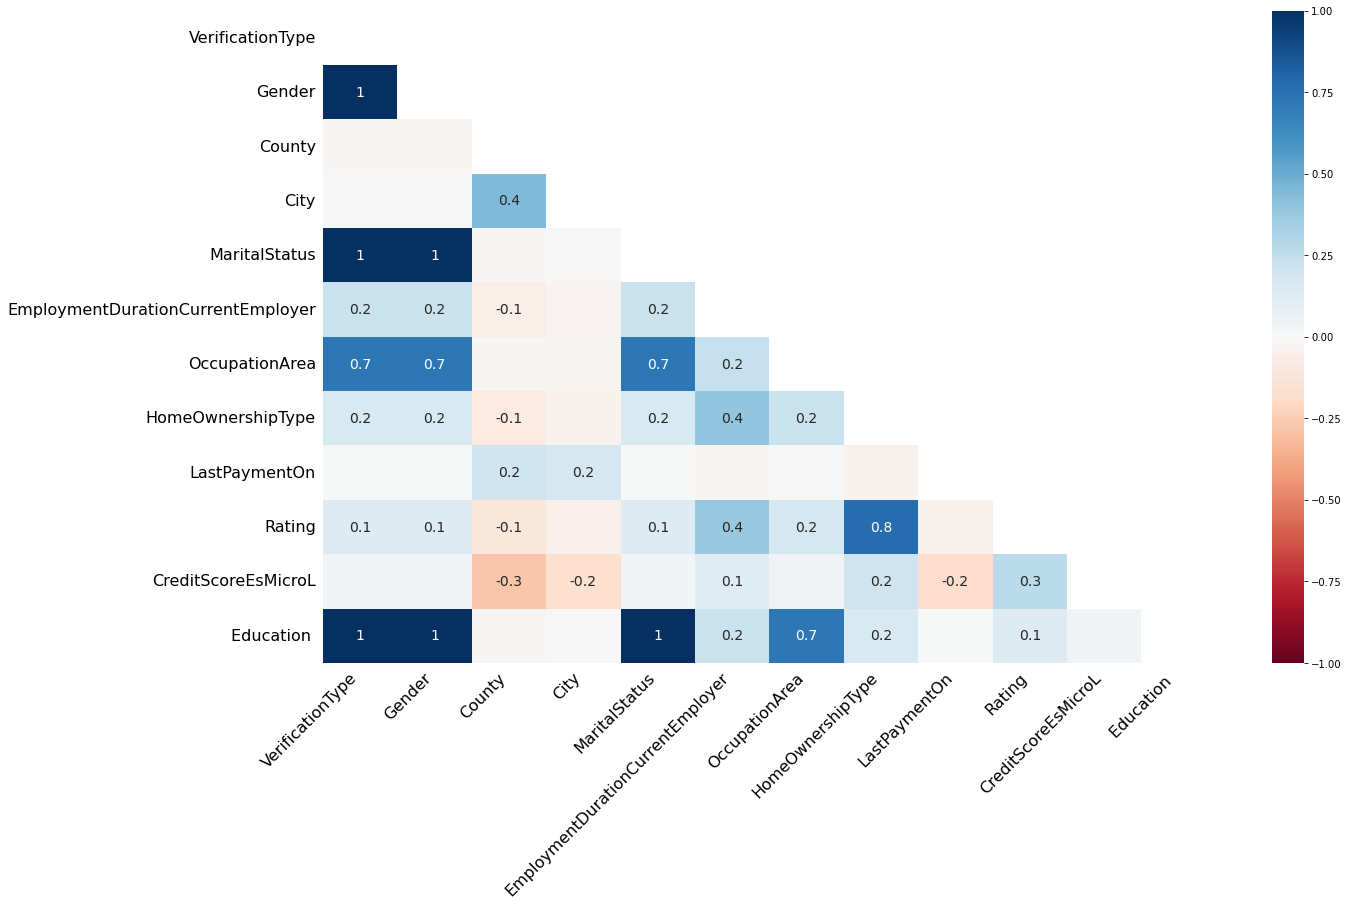

<Figure size 2160x2160 with 0 Axes>

In [54]:
msno.heatmap(data[cat_cols], labels = True)
plt.figure(figsize = (30,30))
plt.show()

there is a relation between county and city(50%)
and between WorseLateCategory and StageActiveSince (90%)

In [55]:
delcol=['ReportAsOfEOD','LoanNumber','ListedOnUTC','BiddingStartedOn','DateOfBirth','BiddingStartedOn','UserName','NextPaymentNr','IncomeFromPrincipalEmployer', 'IncomeFromPension', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare','IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour', 'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate', 'LastPaymentOn', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn', 'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 'StageActiveSince', 'ModelVersion','WorseLateCategory','LoanDate','FirstPaymentDate','MaturityDate_Original','MaturityDate_Last']
# data.drop(delcol[i],axis=1,inplace=True)

<AxesSubplot:>

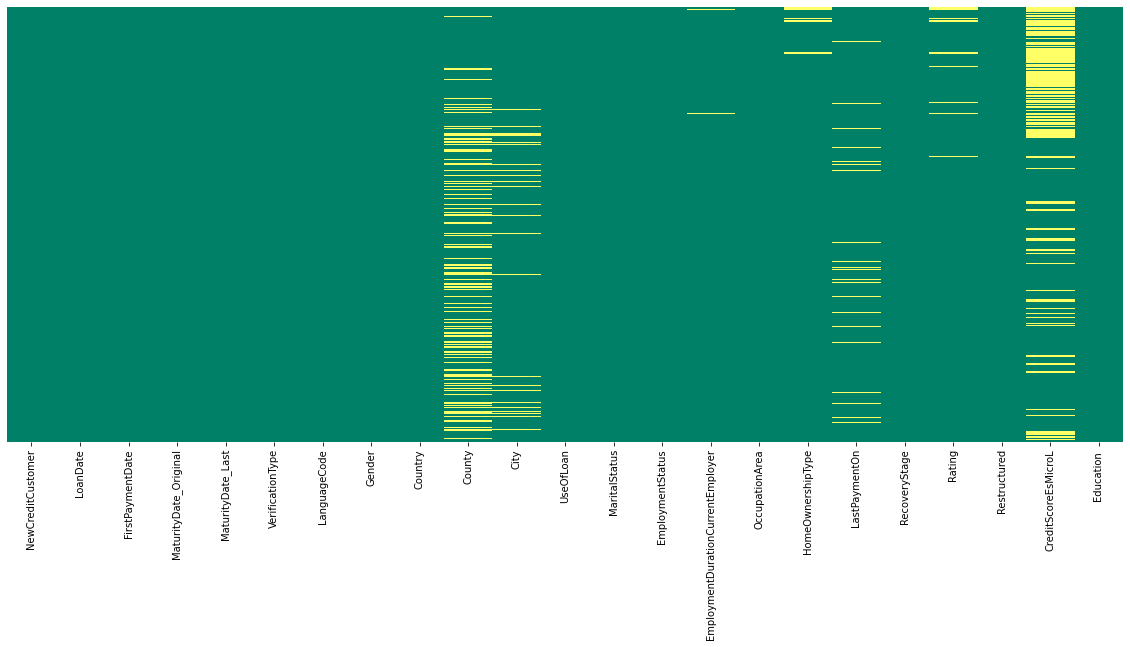

In [56]:
plt.figure(figsize=(20,8))
sns.heatmap(data[cat_cols].isnull(), yticklabels=False, cbar=False, cmap = 'summer')

In [57]:
# plt.figure(figsize=(25, 10))
# sns.countplot(data=data, x="City", hue="Status")
# # plt.show()

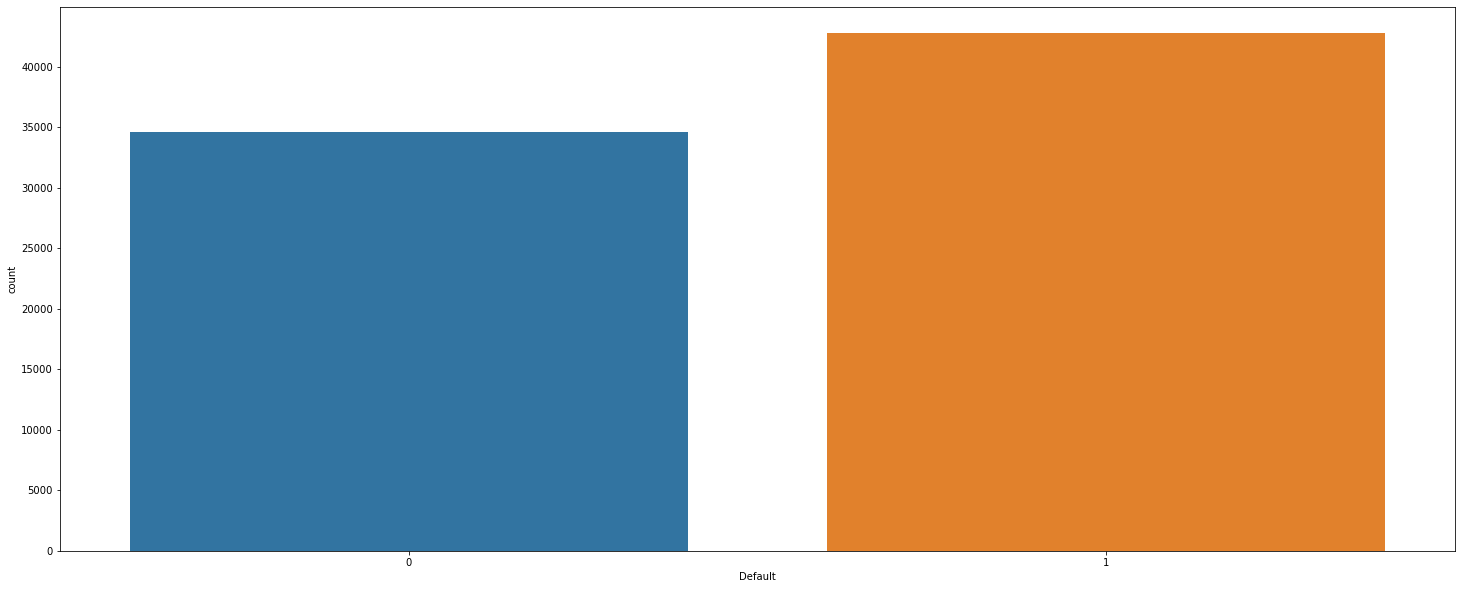

In [58]:
plt.figure(figsize=(25, 10))
sns.countplot(data=data, x="Default")
plt.show()

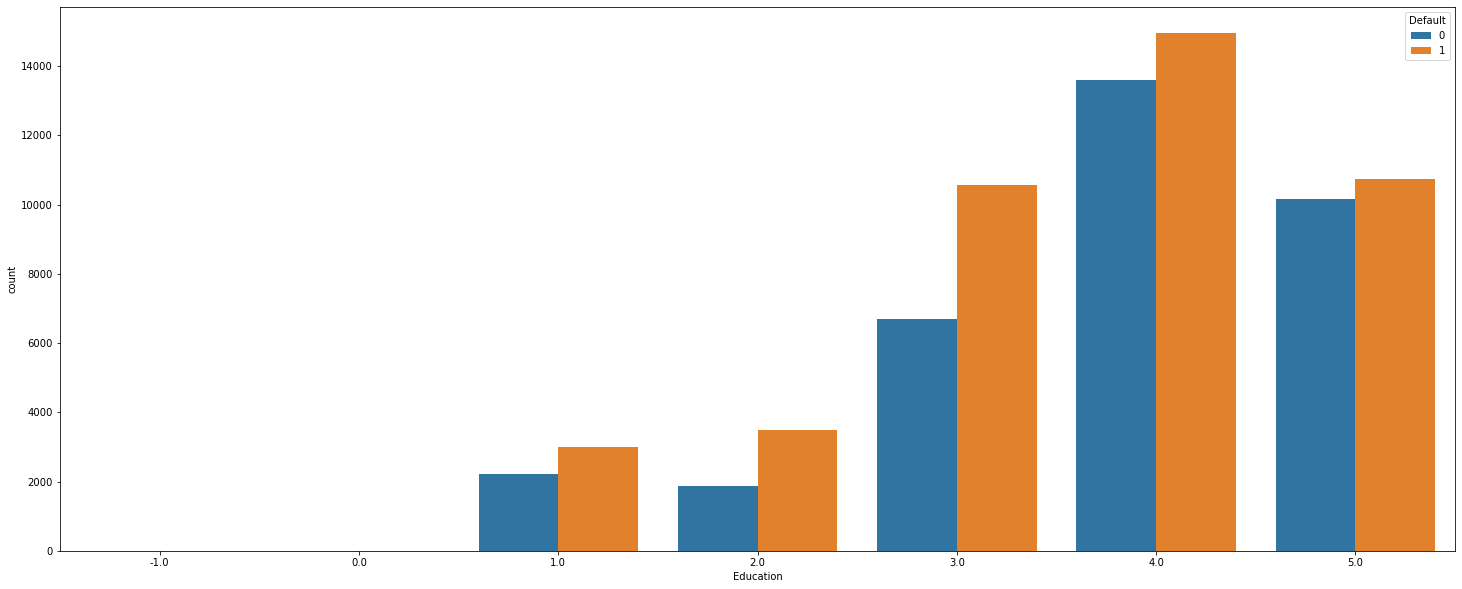

In [59]:
plt.figure(figsize=(25, 10))
sns.countplot(data=data, x="Education", hue="Default")
plt.show()

In [60]:
data['Education'] = data['Education'].replace([-1.0,0.0],'6.0')

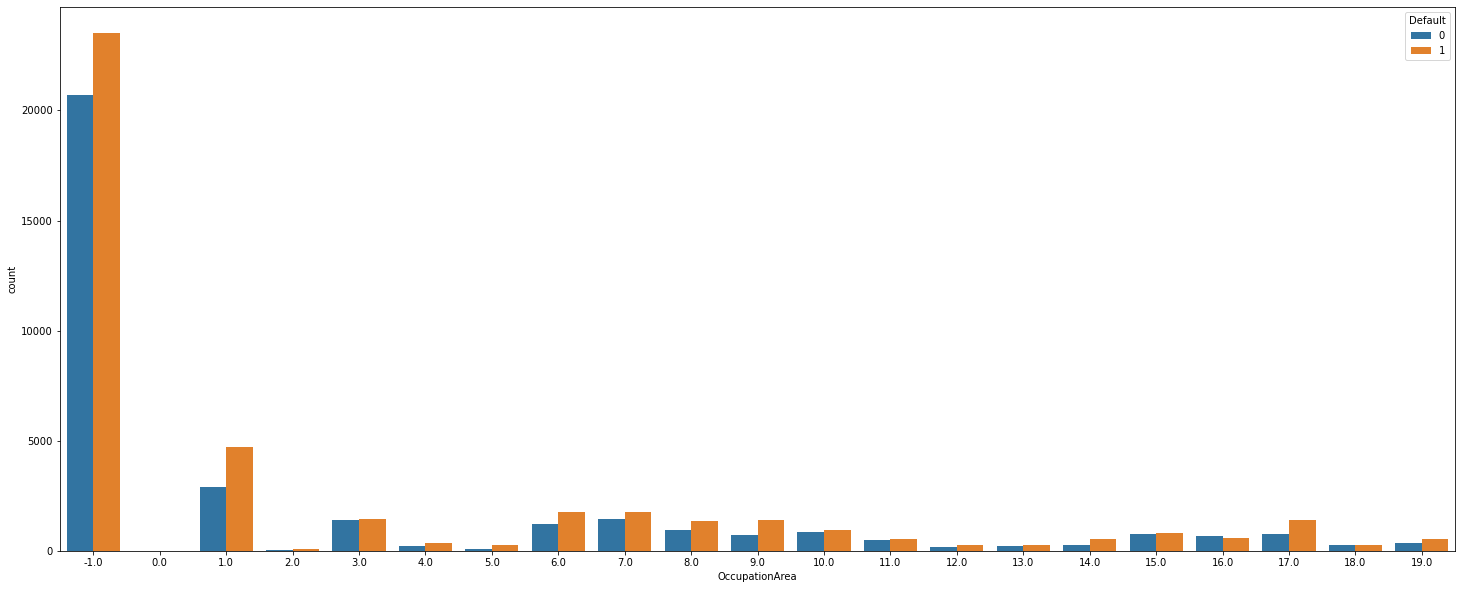

In [61]:
plt.figure(figsize=(25, 10))
sns.countplot(data=data, x="OccupationArea", hue="Default")
plt.show()

In [62]:
data['OccupationArea'] = data['OccupationArea'].replace([-1.0,0.0],'unknown')

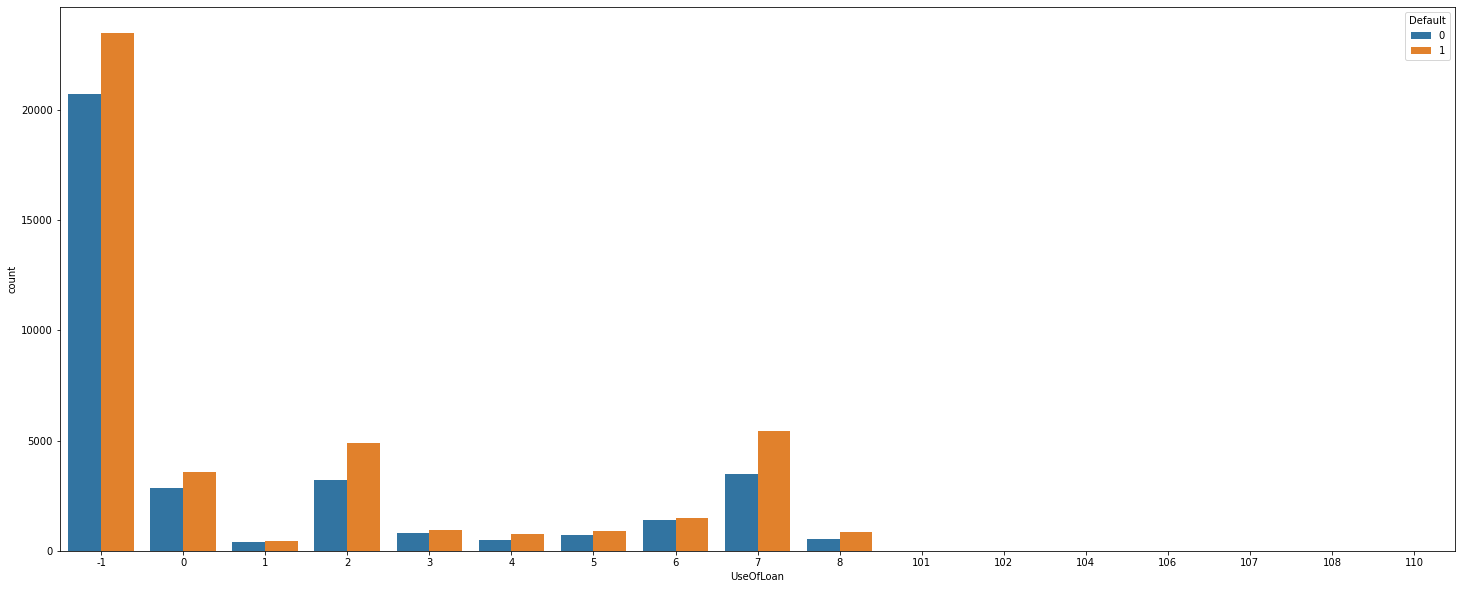

In [63]:
plt.figure(figsize=(25, 10))
sns.countplot(data=data, x="UseOfLoan", hue="Default")
plt.show()

In [64]:
data['UseOfLoan'] = data['UseOfLoan'].replace([-1,0,102,108,110],'notset')

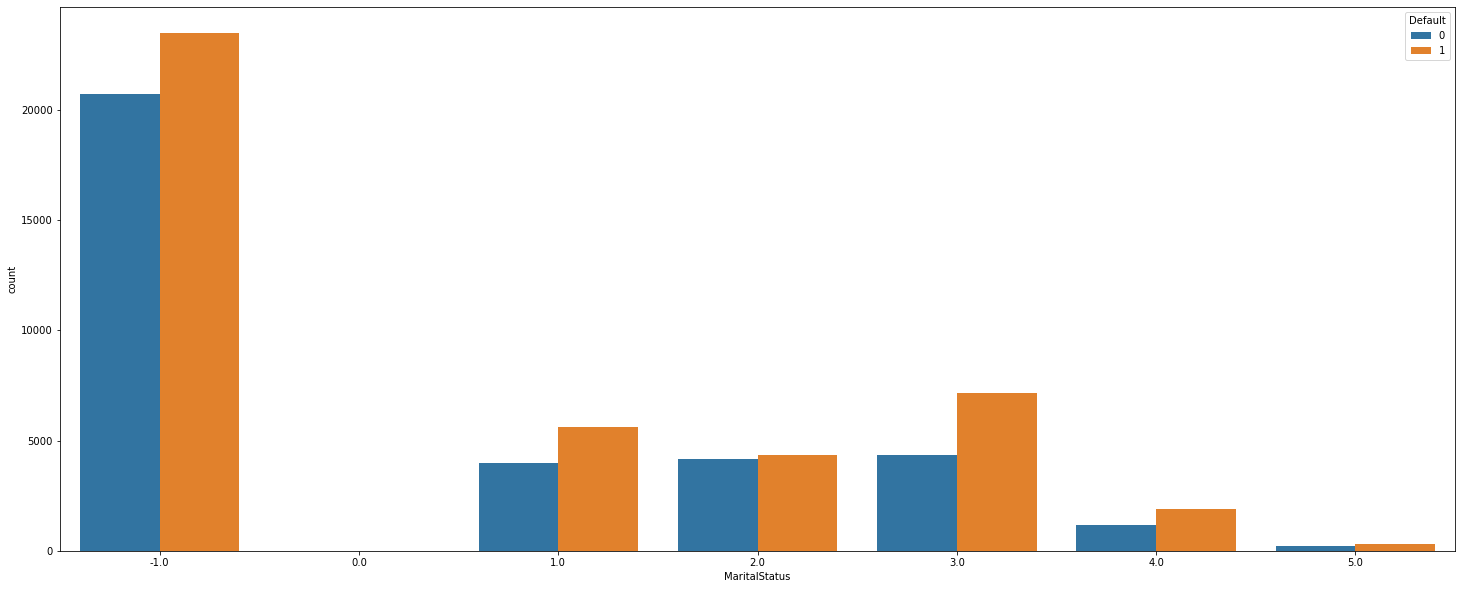

In [65]:
plt.figure(figsize=(25, 10))
sns.countplot(data=data, x="MaritalStatus", hue="Default")
plt.show()

In [66]:
data['MaritalStatus'] = data['MaritalStatus'].replace([-1.0,0.0],'notset')

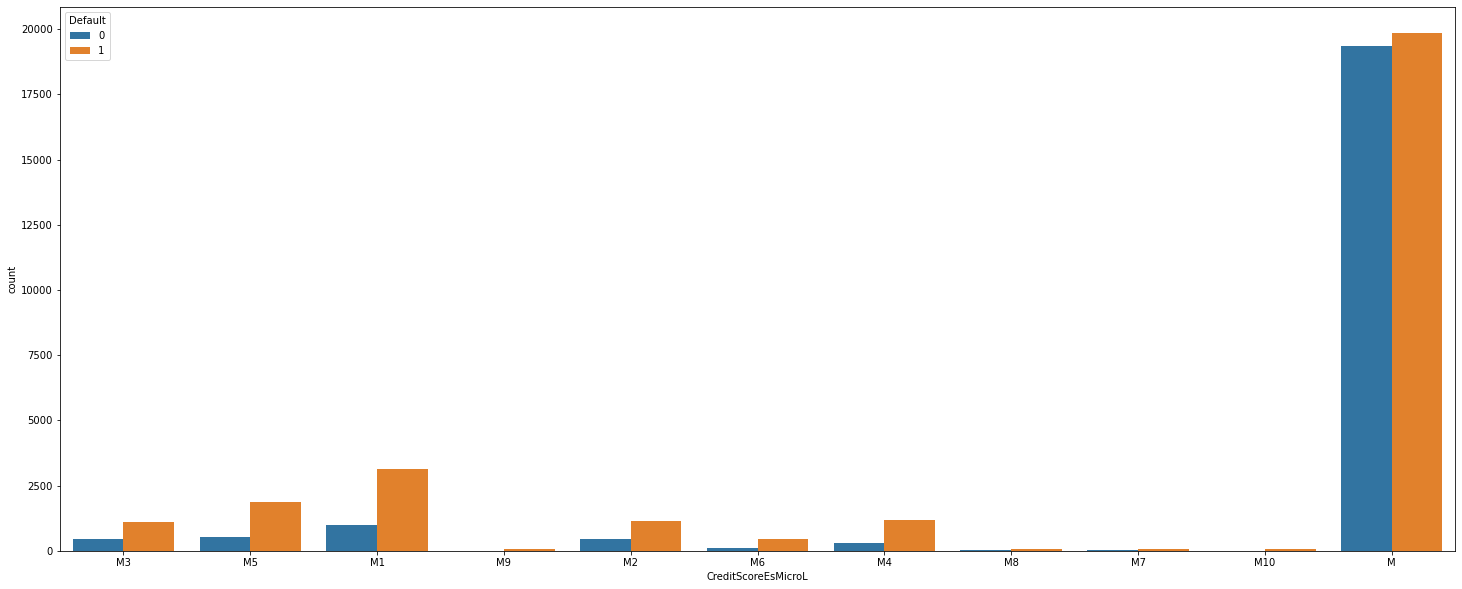

In [67]:
plt.figure(figsize=(25, 10))
sns.countplot(data=data, x="CreditScoreEsMicroL", hue="Default")
plt.show()

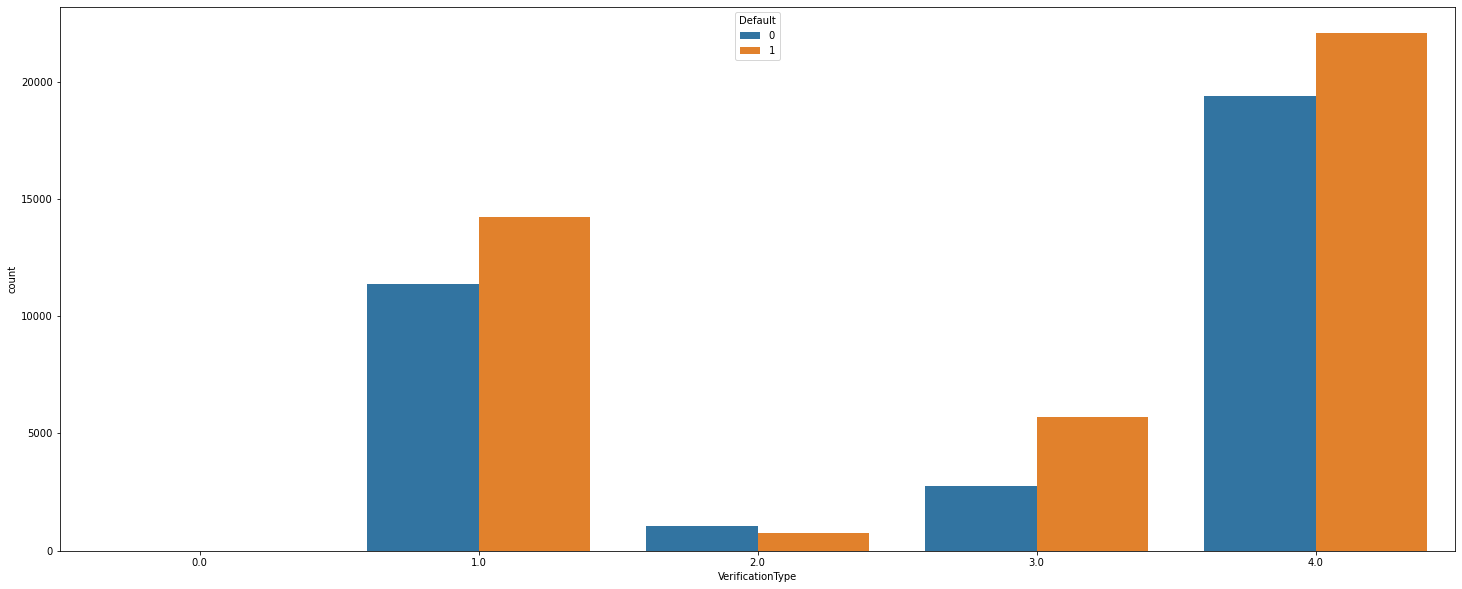

In [68]:
plt.figure(figsize=(25, 10))
sns.countplot(data=data, x="VerificationType", hue="Default")
plt.show()

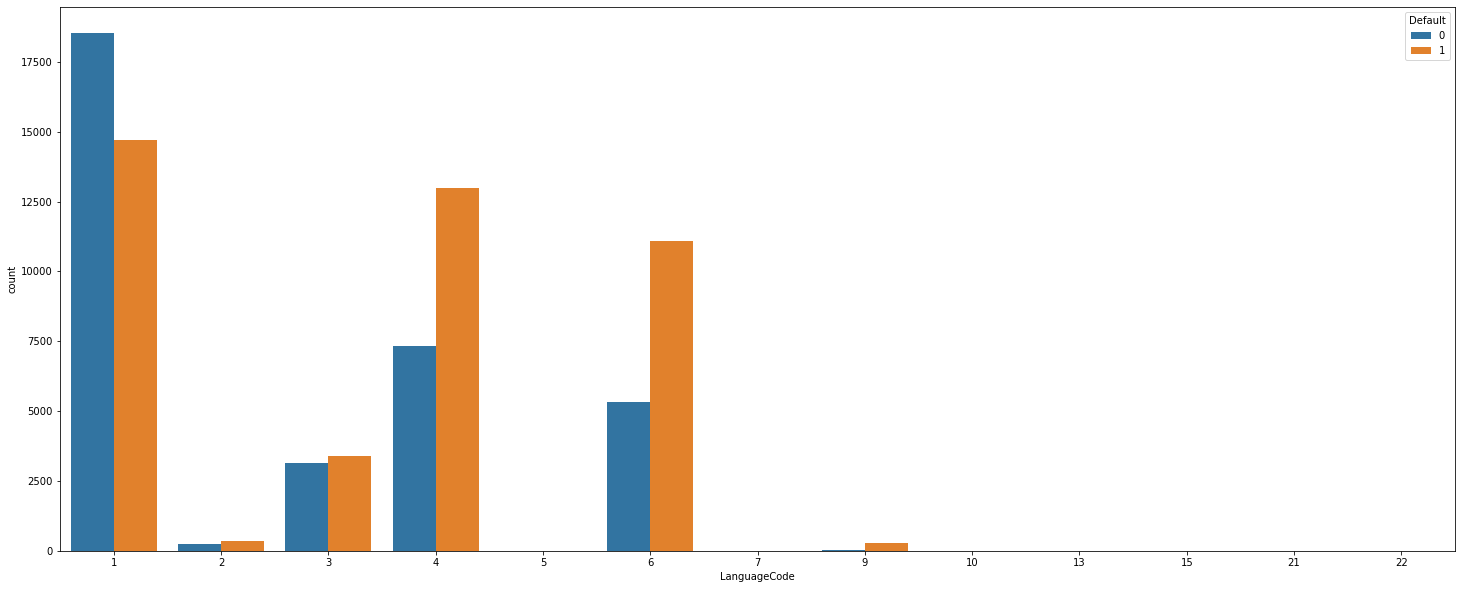

In [69]:

plt.figure(figsize=(25, 10))
sns.countplot(data=data, x="LanguageCode", hue="Default")
plt.show()

In [70]:
data['LanguageCode'] = data['LanguageCode'].replace([7,10,2,3,13,15,21,22,5,'not_set',0,9,'other'],'other')

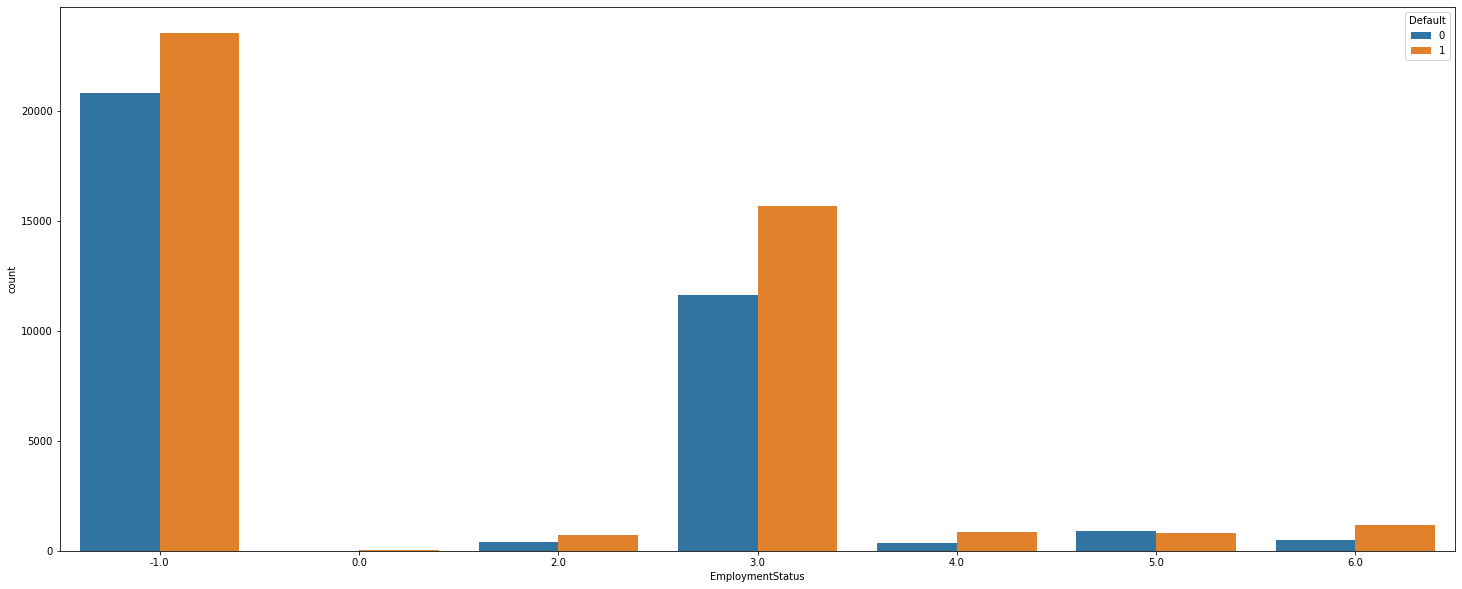

In [71]:
plt.figure(figsize=(25, 10))
sns.countplot(data=data, x="EmploymentStatus", hue="Default")
plt.show()

In [72]:
data['EmploymentStatus'] = data['EmploymentStatus'].replace([-1.0,0.0],'unknown')
data['EmploymentStatus'] = data['EmploymentStatus'].replace([2.0,4.0,5.0,6.0],'unknown')

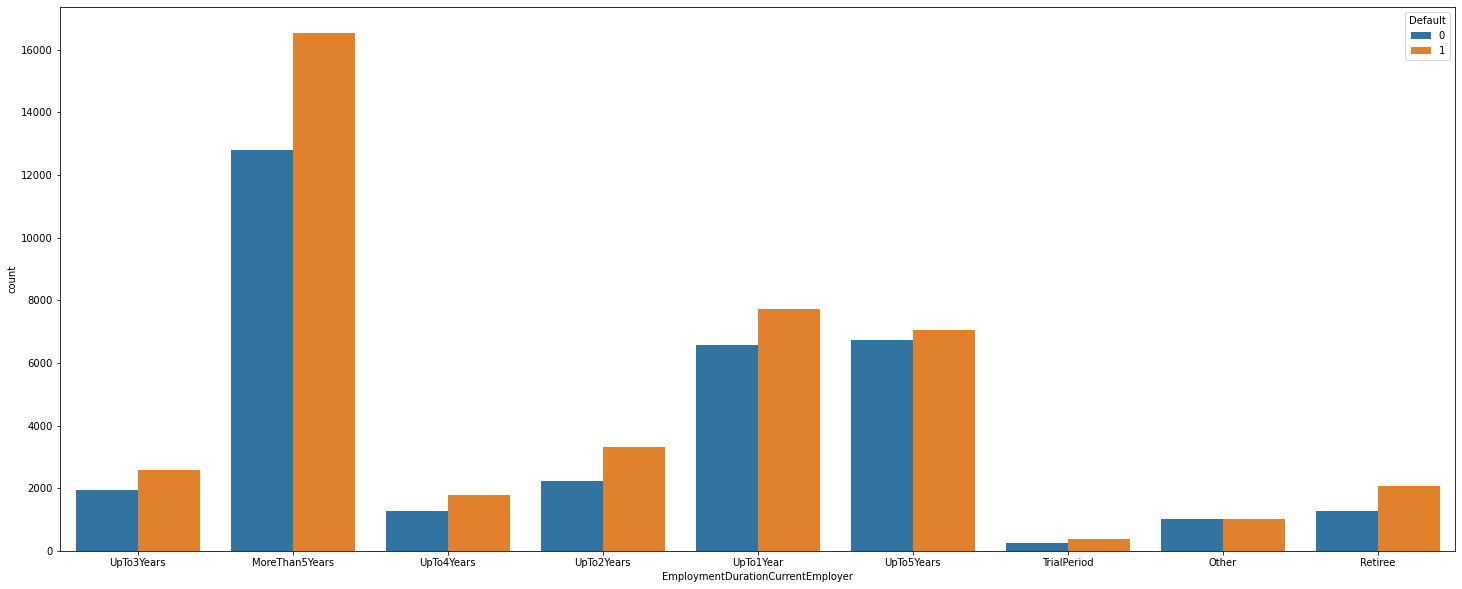

In [73]:
plt.figure(figsize=(25, 10))
sns.countplot(data=data, x="EmploymentDurationCurrentEmployer", hue="Default")
plt.show()

In [74]:
data['EmploymentDurationCurrentEmployer'] = data['EmploymentDurationCurrentEmployer'].replace(['missing','UpTo1Years','UpTo2Years','UpTo3Years','UpTo3Year'],'UpTo3Years')

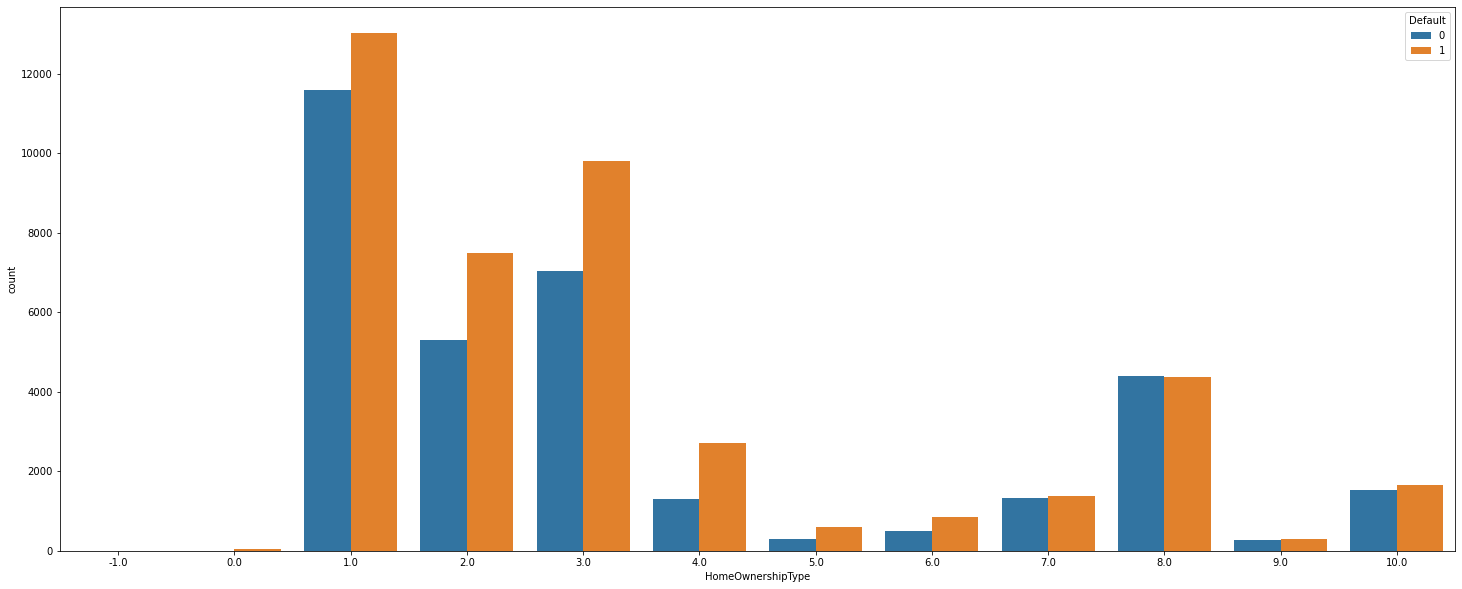

In [75]:
plt.figure(figsize=(25, 10))
sns.countplot(data=data, x="HomeOwnershipType", hue="Default")
plt.show()

In [76]:
data['HomeOwnershipType'] = data['HomeOwnershipType'].replace([-1.0,0.0],'other')

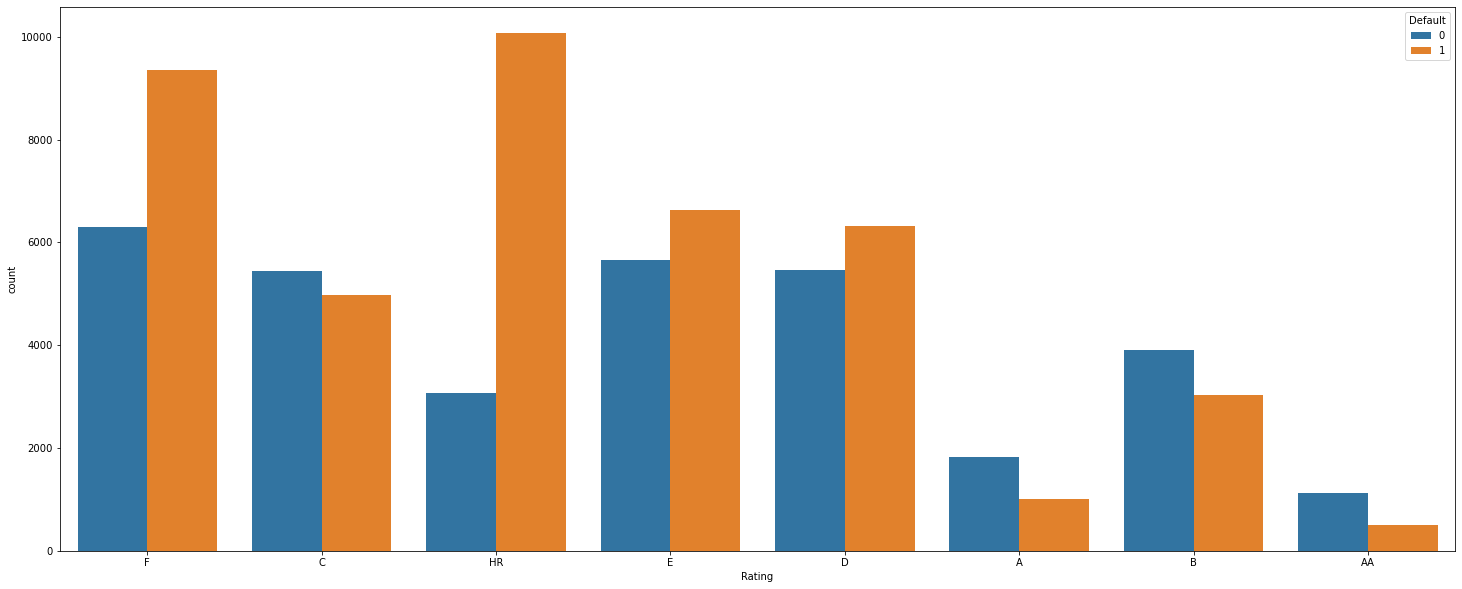

In [77]:
plt.figure(figsize=(25, 10))
sns.countplot(data=data, x="Rating", hue="Default")
plt.show()

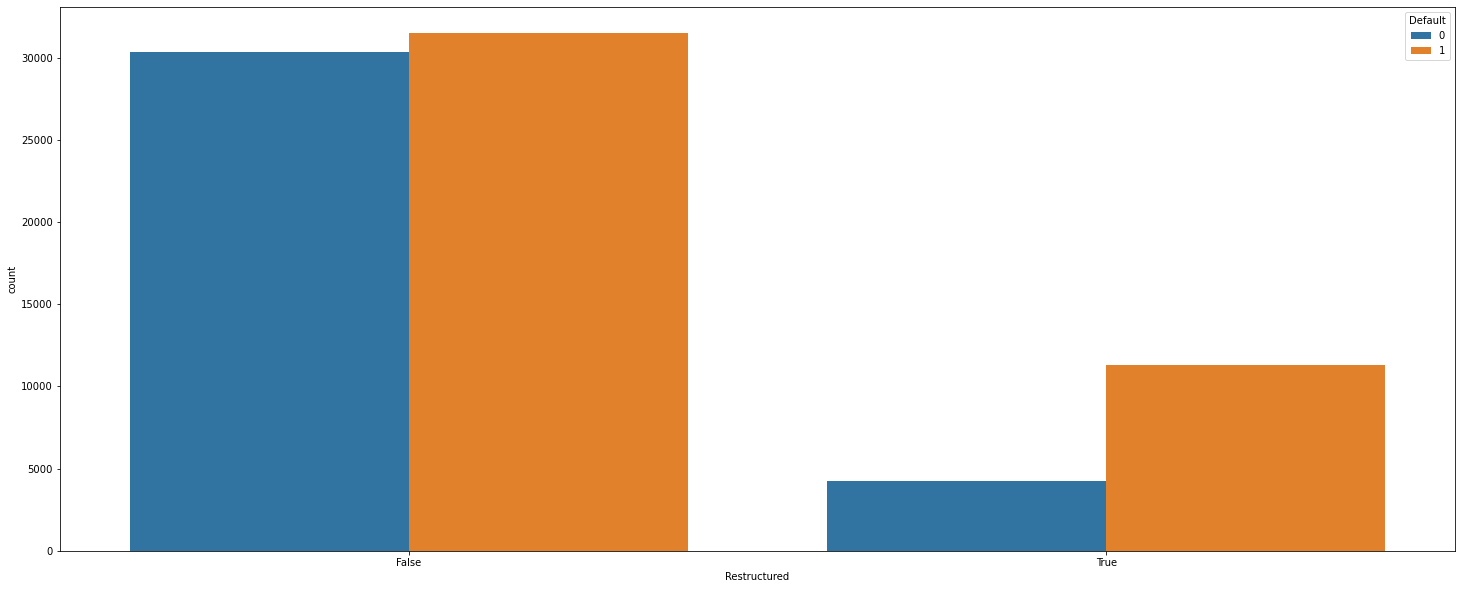

In [78]:
plt.figure(figsize=(25, 10))
sns.countplot(data=data, x="Restructured", hue="Default")
plt.show()

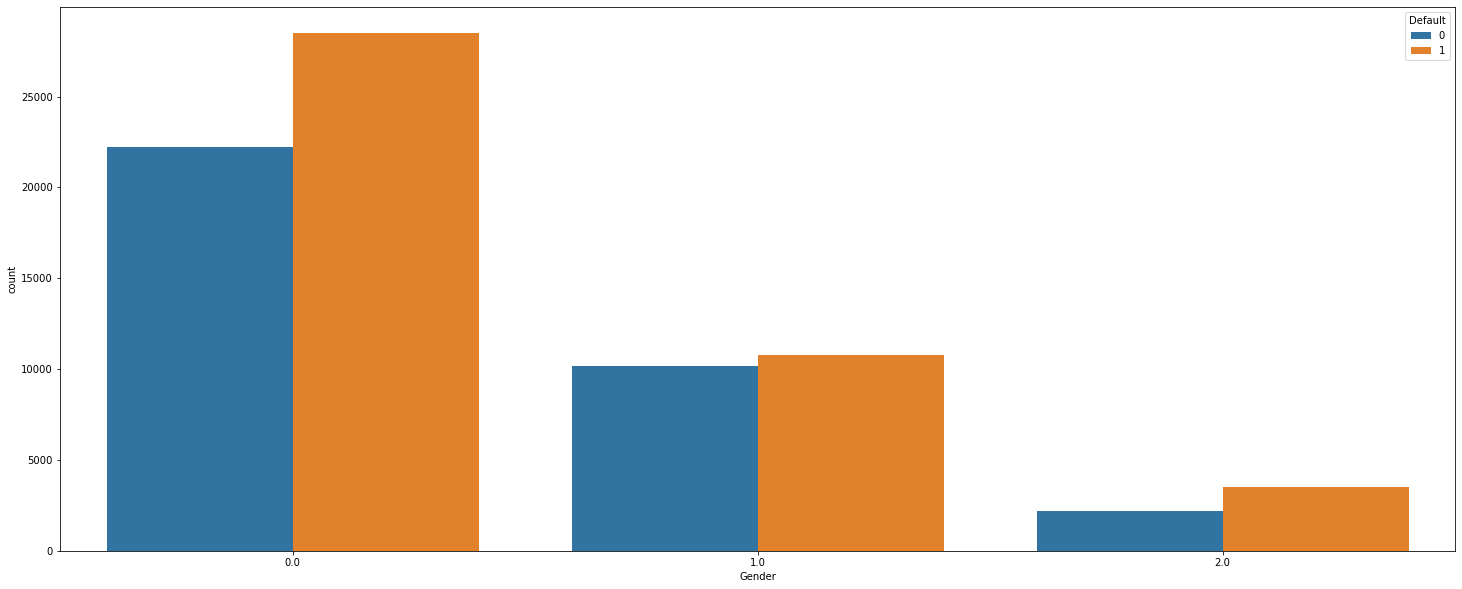

In [79]:
plt.figure(figsize=(25, 10))
sns.countplot(data=data, x="Gender", hue="Default")
plt.show()

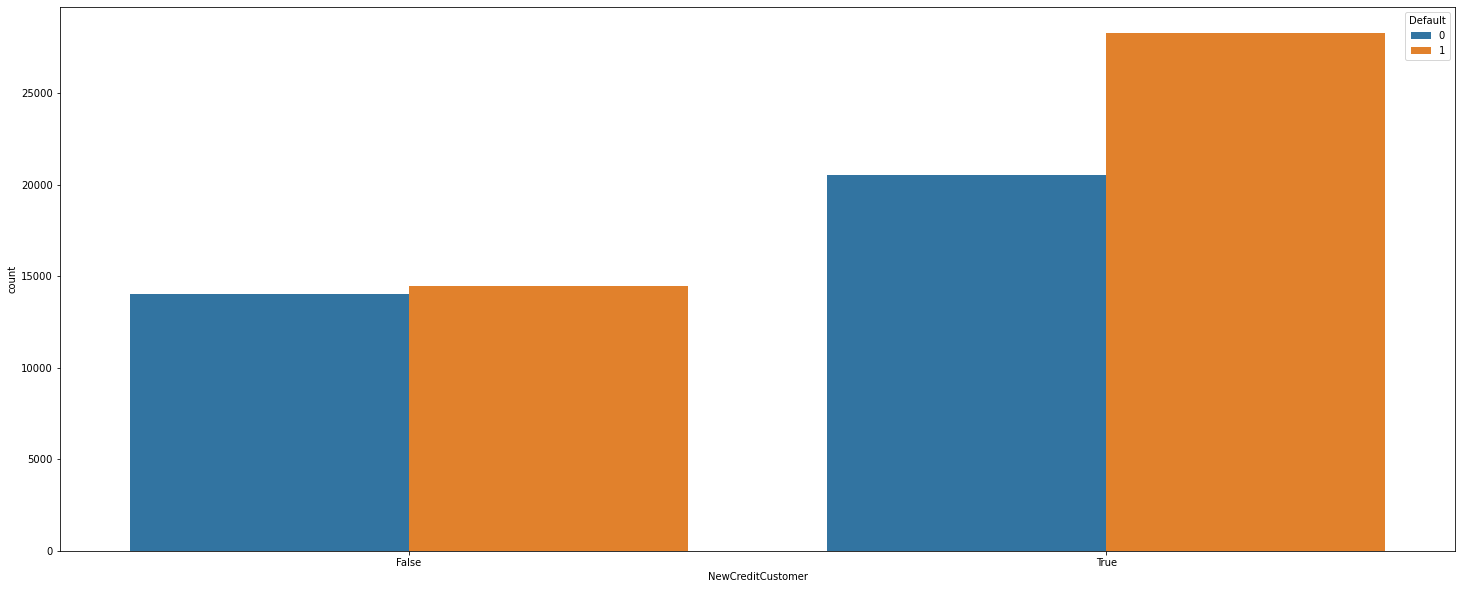

In [80]:
plt.figure(figsize=(25, 10))
sns.countplot(data=data, x="NewCreditCustomer", hue="Default")
plt.show()

In [81]:
data['County']=data['County'].fillna(data['County'].mode().iloc[0])                             
data['City']=data['City'].fillna(data['City'].mode().iloc[0]) 
# CreditScoreEsMicroL 
data['CreditScoreEsMicroL']=data['CreditScoreEsMicroL'].fillna(data['CreditScoreEsMicroL'].mode().iloc[0])
data['Rating']=data['Rating'].fillna('missing')
data['EmploymentDurationCurrentEmployer']=data['EmploymentDurationCurrentEmployer'].fillna('missing')

In [82]:
data.isnull().sum()

BidsPortfolioManager                         0
BidsApi                                      0
BidsManual                                   0
NewCreditCustomer                            0
LoanDate                                     0
FirstPaymentDate                             0
MaturityDate_Original                        0
MaturityDate_Last                            0
VerificationType                            45
LanguageCode                                 0
Age                                          0
Gender                                      45
Country                                      0
AppliedAmount                                0
Amount                                       0
Interest                                     0
LoanDuration                                 0
MonthlyPayment                               0
County                                       0
City                                         0
UseOfLoan                                    0
Education    

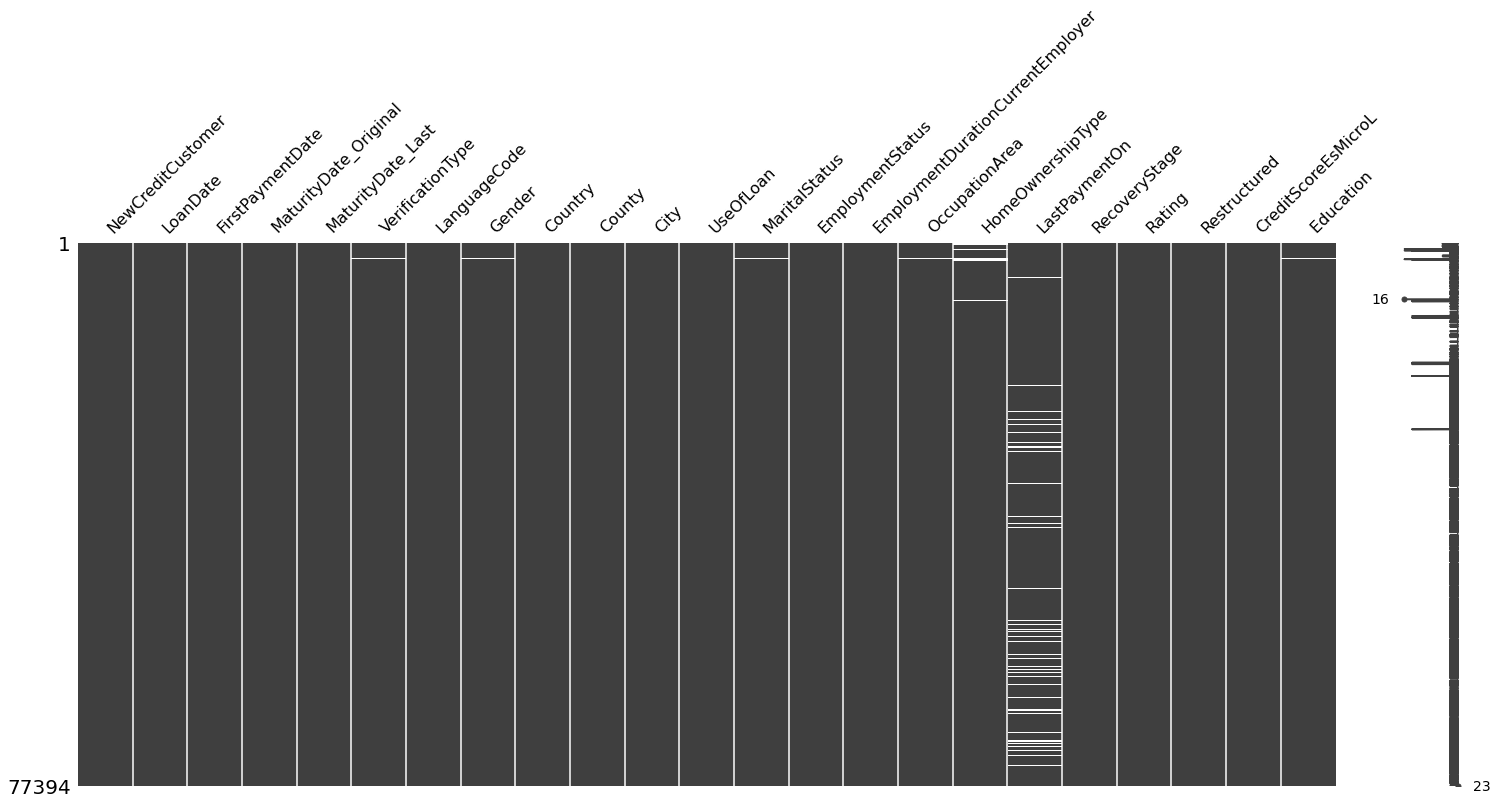

<Figure size 1440x1080 with 0 Axes>

In [83]:
msno.matrix(data[cat_cols])
plt.figure(figsize = (20,15))
plt.show()

# CATEGORICAL COLUMN ENCODING

In [84]:
data=data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   BidsPortfolioManager                    77394 non-null  int64   
 1   BidsApi                                 77394 non-null  int64   
 2   BidsManual                              77394 non-null  float64 
 3   NewCreditCustomer                       77394 non-null  bool    
 4   LoanDate                                77394 non-null  object  
 5   FirstPaymentDate                        77394 non-null  object  
 6   MaturityDate_Original                   77394 non-null  object  
 7   MaturityDate_Last                       77394 non-null  object  
 8   VerificationType                        77349 non-null  category
 9   LanguageCode                            77394 non-null  category
 10  Age                                     77394 

In [85]:
cat_cols=data.select_dtypes(exclude=['int','float']).columns
cat_cols
data.drop(['Education '],axis=1,inplace=True)

In [86]:
cat_cols

Index(['NewCreditCustomer', 'LoanDate', 'FirstPaymentDate',
       'MaturityDate_Original', 'MaturityDate_Last', 'VerificationType',
       'LanguageCode', 'Gender', 'Country', 'County', 'City', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'LastPaymentOn', 'RecoveryStage', 'Rating',
       'Restructured', 'CreditScoreEsMicroL', 'Education '],
      dtype='object')

# SCALING

In [87]:
num_cols = [col for col in data.columns if data[col].dtype =='float64' or data[col].dtype =='int32']
num_cols

['BidsManual',
 'AppliedAmount',
 'Amount',
 'Interest',
 'MonthlyPayment',
 'IncomeTotal',
 'LiabilitiesTotal',
 'DebtToIncome',
 'FreeCash',
 'CreditScoreEeMini',
 'PrincipalPaymentsMade',
 'InterestAndPenaltyPaymentsMade',
 'PrincipalBalance',
 'InterestAndPenaltyBalance',
 'AmountOfPreviousLoansBeforeLoan']

In [90]:
import pickle

In [91]:
#pickle.dump(scaler_num,open('ML_DEPLOYMENT_MODELS/SCALER_NUM.pkl',"wb"))

In [92]:
np.round(data[num_cols].describe(),1)

,BidsManual,AppliedAmount,Amount,Interest,MonthlyPayment,IncomeTotal,LiabilitiesTotal,DebtToIncome,FreeCash,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,AmountOfPreviousLoansBeforeLoan
count,77394.0,77394.0,77394.0,77394.0,77394.0,77394.0,77394.0,77349.0,77349.0,77394.0,77394.0,77394.0,77394.0,77394.0,77394.0
mean,563.0,2747.0,2472.7,40.3,127.9,1869.0,714.9,12.0,195.2,975.5,1077.6,502.8,1372.3,1215.0,2172.7
std,821.8,2463.5,2163.7,30.6,126.0,6193.5,44591.4,18.8,848.7,78.4,1648.9,829.2,1944.3,3220.0,3889.6
min,0.0,32.0,6.4,3.0,0.0,0.0,0.0,0.0,-2332.0,0.0,0.0,0.0,-34.2,-2.7,0.0
25%,19.0,740.0,740.0,23.4,43.1,890.0,113.0,0.0,0.0,1000.0,61.7,37.4,0.0,0.0,0.0
50%,283.0,2125.0,2020.0,32.0,101.1,1300.0,383.0,0.0,0.0,1000.0,462.8,191.2,516.9,84.8,0.0
75%,745.0,3720.0,3185.0,50.3,162.1,2000.0,736.0,20.8,269.4,1000.0,1451.3,612.4,2112.0,1084.0,3000.0
max,10630.0,10632.0,10632.0,264.3,2368.5,1012019.0,12400000.0,198.0,158748.6,1000.0,10632.0,14507.2,10632.0,64494.8,51104.0


In [ ]:
data.to_csv(r'C:\Users\ASUS\OneDrive\Documents\TECHNOCOLABS\Analysing-Credit-Risk-on-European-Peer-to-Peer-lending-Firm-Bandora\Bandora_cleaned.csv',index=False)

In [ ]:
data.info()

In [ ]:
plt.figure(figsize=(25, 10))
sns.countplot(data=data, x="RecoveryStage", hue="Default")
plt.show()

In [ ]:
data['CreditScoreEsMicroL'].value_counts()

In [ ]:
data['CreditScoreEeMini'].value_counts()